In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))


import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb

sb.set()
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

# Comparative evaluation of quality-weighted clustering methods

The following notebook compares the clustering quality and the number of clusters attained by the quality-weighted clustering methods of GeFaST, USEARCH and VSEARCH.   
The evaluation uses the results on the Callahan data sets and on the Franzén data sets:
 - Callahan et al., *DADA2: High-resolution sample inference from Illumina amplicon data* (https://doi.org/10.1038/nmeth.3869)
 - Franzén et al., *Improved OTU-picking using long-read 16S rRNA gene amplicon sequencing and generic hierarchical clustering* (https://doi.org/10.1186/s40168-015-0105-6)
 
This evaluation relies on the CSV outputs of the notebooks of the evaluations specific to the different tools and data sets.
The required files are listed below.

### GeFaST variants
GeFaST is evaluated in different modes (`as`, `lev`, `qas`, `qlev`), with different quality-weighting techniques (Clement, Converge-A, Converge-B, Frith, Kim-A, Kim-B, Malde-A, Malde-B, Malde-C) and with different boosting functions (`linear`, `mult`, `root`).

The different (quality-weighted) variants are usually referred to by an abbreviation hinting at the mode, quality-weighting technique and boosting function (including parameters): `<variant>_<boosting>_<mode>-<quality weighting>`, e.g. `mw_unboosted_qas-ka` and `v1_root2_qlev-cb`.
The two completely unweighted variants in alignment-score and Levenshtein mode are denoted as `original_as` and `original_lev`, respectively.

Values of `<variant>`:

| Abbreviation | Description |
| --: | :-- |
| muw | matches in an alignment are *not* quality-weighted, unboosted variant |
| mw  | matches in an alignment are quality-weighted, unboosted variant |
| v1  | matches in an alignment are quality-weighted, inner boosting |
| v2  | matches in an alignment are *not* quality-weighted, inner boosting |
| v3  | matches in an alignment are quality-weighted, outer boosting |
| v4  | matches in an alignment are *not* quality-weighted, outer boosting |

Values of `<boosting>`:

| Abbreviation | Description |
| --: | :-- |
| unboosted    | unboosted variant |
| linear*x*    | linear boosting starting at `linear_start` = *x*  |
| mult*x*      | multiplicative boosting with `mult_factor` = *x* |
| root*x*      | unshifted root boosting with `root_degree` = *x* |
| rootshift*x* | shifted root boosting with `root_degree` = *x* and `root_shift` = *full* |

The `<mode>` of a quality-weighted run is either `qas` or `qlev`.

Values of `<quality-weighting>`:

| Abbreviation | Description |
| --: | :-- |
| c  | quality weighting with Clement cost function `banded-score-clement` |
| ca | quality weighting with Converge-A cost function `banded-score-converge-a` |
| cb | quality weighting with Converge-B cost function `banded-score-converge-b` |
| f  | quality weighting with Frith cost function `banded-score-frith` |
| ka | quality weighting with Kim-A cost function `banded-score-kim-a` |
| kb | quality weighting with Kim-B cost function `banded-score-kim-b` |
| ma | quality weighting with Malde-A cost function `banded-score-malde-a` |
| mb | quality weighting with Malde-B cost function `banded-score-malde-b` |
| mc | quality weighting with Malde-C cost function `banded-score-malde-c` |


### USEARCH & VSEARCH variants
USEARCH is evaluated for the `cluster_fast` command with the option `-sort size`,
while VSEARCH is included in the variant using the `cluster_size` command. 

In [ ]:
# Required files:
#
# analyses
# |- quality_weighted_callahan  # evaluation of GeFaST's quality-weighted clustering methods on Callahan data
# |  \- evaluation
# |     |- df_joined_max_avg.csv
# |     |- df_joined_mean_avg.csv
# |     \- df_joined_nbest_avg.csv
# |
# |- quality_weighted_franzen  # evaluation of GeFaST's quality-weighted clustering methods on Franzén data
# |  \- evaluation
# |     |- df_joined_max_avg.csv
# |     |- df_joined_mean_avg.csv
# |     \- df_joined_nbest_avg.csv
# |
# |- uvsearch_callahan  # evaluation of USEARCH and VSEARCH on Callahan data
# |  \- evaluation
# |     |- df_joined_max_avg.csv
# |     |- df_joined_mean_avg.csv
# |     \- df_joined_nbest_avg.csv
# |
# \- uvsearch_franzen  # evaluation of USEARCH and VSEARCH on Franzén data
#    \- evaluation
#       |- df_joined_max_avg.csv
#       |- df_joined_mean_avg.csv
#       \- df_joined_nbest_avg.csv

### Load the evaluation data

**GeFaST**

In [2]:
# Callahan data sets
callahan_gefast_dir = 'quality_weighted_callahan/evaluation'
df_callahan_gefast_joined_max_avg = pd.read_csv('%s/df_joined_max_avg.csv' % callahan_gefast_dir, sep = ';')
df_callahan_gefast_joined_mean_avg = pd.read_csv('%s/df_joined_mean_avg.csv' % callahan_gefast_dir, sep = ';')
df_callahan_gefast_joined_nbest_avg = pd.read_csv('%s/df_joined_nbest_avg.csv' % callahan_gefast_dir, sep = ';')

# Franzén data sets
franzen_gefast_dir = 'quality_weighted_franzen/evaluation'
df_franzen_gefast_joined_max_avg = pd.read_csv('%s/df_joined_max_avg.csv' % franzen_gefast_dir, sep = ';')
df_franzen_gefast_joined_mean_avg = pd.read_csv('%s/df_joined_mean_avg.csv' % franzen_gefast_dir, sep = ';')
df_franzen_gefast_joined_nbest_avg = pd.read_csv('%s/df_joined_nbest_avg.csv' % franzen_gefast_dir, sep = ';')

**USEARCH / VSEARCH**

In [3]:
# Callahan data sets
callahan_uvsearch_dir = 'uvsearch_callahan/evaluation'
df_callahan_uvsearch_joined_max_avg = pd.read_csv('%s/df_joined_max_avg.csv' % callahan_uvsearch_dir, sep = ';')
df_callahan_uvsearch_joined_mean_avg = pd.read_csv('%s/df_joined_mean_avg.csv' % callahan_uvsearch_dir, sep = ';')
df_callahan_uvsearch_joined_nbest_avg = pd.read_csv('%s/df_joined_nbest_avg.csv' % callahan_uvsearch_dir, sep = ';')

# Franzén data sets
franzen_uvsearch_dir = 'uvsearch_franzen/evaluation'
df_franzen_uvsearch_joined_max_avg = pd.read_csv('%s/df_joined_max_avg.csv' % franzen_uvsearch_dir, sep = ';')
df_franzen_uvsearch_joined_mean_avg = pd.read_csv('%s/df_joined_mean_avg.csv' % franzen_uvsearch_dir, sep = ';')
df_franzen_uvsearch_joined_nbest_avg = pd.read_csv('%s/df_joined_nbest_avg.csv' % franzen_uvsearch_dir, sep = ';')

## Clustering quality

Comparison of the clustering quality (adjusted Rand index (ARI), precision, recall) of the different tools / modes / refinement options on the different data sets.
For the Franzén data, the 10 data sets of each combination of complexity (e.g. LC) and region (e.g. V4) were averaged.

Considers the clustering quality in three different ways:   
1) *Maximum*: ARI / precision / recall of the respective run (threshold) with the highest ARI on that data set (peak performance).   
2) *Average*: Average ARI / precision / recall over all runs (thresholds) on that data set (robustness of performance). Indicates how sensitive the clustering quality is to not choosing the 'optimal' threshold.   
3) *N-best average*: Average ARI / precision / recall over the respective 5 runs (thresholds) with the highest ARI on that data set (mix of peak performance and robustness of performance). Ignores the worst results for thresholds that are way off but still considers not just the optimal threshold choice.

Below plots consider only selected variants of the different quality-weighting technigues, chosen based on the clustering quality over all considered data sets.
Details on all evaluated variants of the different quality-weighting techniques are available in the corresponding notebooks in the folder `quality_weighted_overall/`.

In [4]:
def comparative_plot_quality_selected(portions, metric, modes, selections,
                     usearch_opt = 'fast_size', vsearch_opt = 'size', 
                     fs = (40, 15), with_leg = True, leg_pos = 0, leg_loc = 'lower left', plot_file = None):

    ratios = [len(p[4]) for p in portions]
    
    colour_palette_a = sb.color_palette('Paired')
    colour_palette_b = sb.color_palette('tab20b')
    colours = {'usearch': colour_palette_a[1], 'vsearch': colour_palette_a[5], 
               'c': colour_palette_b[16], 'ca': colour_palette_b[4], 'cb': colour_palette_b[6], 'f': colour_palette_b[8], 'ka': colour_palette_b[0], 'kb': colour_palette_b[2], 'ma': colour_palette_b[12], 'mb': colour_palette_b[14], 'mc': colour_palette_b[15]
              }
    markers = {'usearch': 'x', 'vsearch' : 'x', 'unboosted': '>', 'boosted': '<'}
    marker_size = 80
    width = 0.8
    
    label_map = {'precision': 'Precision', 'recall': 'Recall', 'adjrandindex': 'Adjusted Rand index', 
                 'fast_size': 'fast / size', 'size': 'size', 'as': 'as', 'qas': 'qas', 'lev': 'lev', 'qlev': 'qlev', 
                 'c': 'Clement', 'ca': 'Converge-A', 'cb': 'Converge-B', 'f': 'Frith',
                 'ka': 'Kim-A', 'kb': 'Kim-B', 'ma': 'Malde-A', 'mb': 'Malde-B', 'mc': 'Malde-C'}
    xticklabel_size = 25
    yticklabel_size = 25
    xlabel_size = 30
    ylabel_size = 30
    leg_size = 20
    
    mode, qmode = modes
    
    
    sb.set_style('white')
    fig, axes = plt.subplots(nrows = 1, ncols = len(portions), figsize = fs, sharey = True, gridspec_kw = {'width_ratios' : ratios})
    
    legend_markers = []
    legend_labels = []
    
    qw_opts = ['c', 'ca', 'cb', 'f', 'ka', 'kb', 'ma', 'mb', 'mc']
    legend_markers.append(plt.Line2D([0,0],[0,0], marker = '', mew = 0.3, linestyle = ''))
    legend_labels.append('GeFaST (%s) with q.w.' % qmode)
    for qw in qw_opts:
        legend_markers.append(plt.Line2D([0,0],[0,0], markeredgecolor = colours[qw], marker = 'o', markerfacecolor = colours[qw], mew = 0.3, linestyle = ''))
        legend_labels.append(label_map[qw])
    legend_markers.append(plt.Line2D([0,0],[0,0], markeredgecolor = 'black', markerfacecolor = 'none', marker = markers['unboosted'], mew = 1.0, linestyle = ''))
    legend_labels.append('Best unboosted')
    legend_markers.append(plt.Line2D([0,0],[0,0], markeredgecolor = 'black', markerfacecolor = 'black', marker = markers['boosted'], mew = 1.0, linestyle = ''))
    legend_labels.append('Best boosted')
    
    # Modes (colours)
    legend_markers.append(plt.Line2D([0,0],[0,0], marker = '', mew = 0.3, linestyle = ''))
    legend_labels.append('Reference tools (mode)')
    
    #legend_markers.append(plt.Line2D([0,0],[0,0], markeredgecolor = colours['usearch'], marker = markers['usearch'], markerfacecolor = colours['usearch'], mew = 1.0, linestyle = ''))
    legend_markers.append(plt.Line2D([0,0],[1,0], marker = '', color = colours['usearch'], mew = 0.3, linestyle = ':'))
    legend_labels.append('USEARCH (%s)' % label_map[usearch_opt])
    
    #legend_markers.append(plt.Line2D([0,0],[0,0], markeredgecolor = colours['vsearch'], marker = markers['vsearch'], markerfacecolor = colours['vsearch'], mew = 1.0, linestyle = ''))
    legend_markers.append(plt.Line2D([0,0],[1,0], marker = '', color = colours['vsearch'], mew = 0.3, linestyle = ':'))
    legend_labels.append('VSEARCH (%s)' % label_map[vsearch_opt])
    
    legend_markers.append(plt.Line2D([0,0],[1,0], marker = '', color = 'black', mew = 0.3, linestyle = ':'))
    legend_labels.append('GeFaST (%s)' % label_map[mode]) 
    
    for _ in range(0, len(qw_opts) - 1):
        legend_markers.append(plt.Line2D([0,0],[0,0], marker = '', mew = 0.3, linestyle = ''))
        legend_labels.append('')      
    
   
    for i, (name, dfg, dfuv, gt, data_sets) in enumerate(portions):
        ax = axes if (len(portions) == 1) else axes[i]
        
        df_gefast = dfg.loc[dfg['mode'].isin(modes) & (dfg['gt'] == gt)]
        df_usearch = dfuv.loc[(dfuv['tool'] == 'usearch') & (dfuv['mode'] == usearch_opt)]
        df_vsearch = dfuv.loc[(dfuv['tool'] == 'vsearch') & (dfuv['mode'] == vsearch_opt)]
        
        xtick_labels = data_sets
        xticks = range(0, len(xtick_labels))
        xlabel = name
        
        for pos, ds in enumerate(data_sets):
            grp_gefast = df_gefast.loc[df_gefast['data_set'] == ds]
            grp_usearch = df_usearch.loc[df_usearch['data_set'] == ds]
            grp_vsearch = df_vsearch.loc[df_vsearch['data_set'] == ds]
            
            step = width / (len(selections) - 1)
        
            # plot USEARCH
            ax.hlines(y = grp_usearch[metric].iloc[0], xmin = pos - 0.5, xmax = pos + 0.5, color = colours['usearch'], linestyle = ':', alpha = 0.9, label = 'USEARCH (%s)' % usearch_opt)
        
            # plot VSEARCH
            ax.hlines(y = grp_vsearch[metric].iloc[0], xmin = pos - 0.5, xmax = pos + 0.5, color = colours['vsearch'], linestyle = ':', alpha = 0.9, label = 'USEARCH (%s)' % usearch_opt)
        
            # plot GeFaST
            ref_val = grp_gefast.loc[grp_gefast['mode'] == mode, metric].iloc[0] # from quality-unweighted mode
            ax.hlines(y = ref_val, xmin = pos - 0.5, xmax = pos + 0.5, linestyle = ':', alpha = 0.8) # quality-unweighted reference line            
            for k, (qw_opt, v_opt, b_opt, b_param, ub) in enumerate(selections):
                
                val = grp_gefast.loc[(grp_gefast['qw_opt'] == qw_opt) & (grp_gefast['v_opt'] == v_opt) & (grp_gefast['b_opt'] == b_opt) & (grp_gefast['b_param'] == b_param), metric].iloc[0]
                val_ub = grp_gefast.loc[(grp_gefast['qw_opt'] == qw_opt) & (grp_gefast['v_opt'] == ub) & (grp_gefast['b_opt'] == 'unboosted') & (grp_gefast['b_param'] == 'none'), metric].iloc[0]

                
                ax.scatter(pos - width / 2 + k * step - 0.02, val_ub, color = colours[qw_opt], marker = markers['unboosted'], facecolor = 'none', s = marker_size)
                ax.scatter(pos - width / 2 + k * step + 0.02, val, color = colours[qw_opt], marker = markers['boosted'], s = marker_size)

        ax.set_xlim(-0.5, len(data_sets) - 0.5)
        
        ax.set_xticks([-0.5], minor = False)
        ax.set_xticklabels([''], minor = False)
        ax.tick_params(axis = 'x', which = 'major', direction = 'out', length = 40, color = 'black' if i > 0 else 'white', pad = -15)
        
        ax.set_xticks(xticks, minor = True)
        ax.set_xticklabels(xtick_labels, fontsize = xticklabel_size, minor = True)
        ax.tick_params(axis = 'x', which = 'minor', direction = 'out', length = 5, color = 'black')
        
        ax.tick_params(axis = 'y', which = 'major', labelsize = yticklabel_size)
        
        ax.tick_params(which = 'major', left = (i == 0))
        ax.tick_params(which = 'both', bottom = True)
        
        ax.grid(True)
        
        ax.set_xlabel(xlabel, fontsize = xlabel_size)
        if i == 0:
            ax.set_ylabel(label_map[metric], fontsize = ylabel_size)
        
        for pos in range(0, len(data_sets) - 1):
            ax.axvline(pos + 0.5, color = 'lightgray', zorder = 3)
        if i > 0:
            ax.axvline(-0.5, color = 'black', zorder = 3) 
        
    plt.subplots_adjust(wspace = 0)
    
    if with_leg:
        axes[leg_pos].legend(legend_markers, legend_labels, fontsize = leg_size, markerscale = 1.5, ncol = 2, loc = leg_loc)

    if plot_file is not None:
        plt.savefig(plot_file, format = 'pdf', dpi = 1200, bbox_inches = 'tight')

### Alignment-score mode and quality alignment-score mode

In [5]:
selected_variants = [('c', 'v2', 'mult', '15', 'muw'), 
                     ('ca', 'v4', 'mult', '15', 'muw'), 
                     ('cb', 'v4', 'mult', '15', 'muw'), 
                     ('f', 'v1', 'root', '2', 'mw'), 
                     ('ka', 'v2', 'root', '9', 'muw'), 
                     ('kb', 'v4', 'linear', '20', 'muw'), 
                     ('ma', 'v3', 'root', '3', 'mw'), 
                     ('mb', 'v4', 'mult', '20', 'muw'),
                     ('mc', 'v4', 'mult', '10', 'muw')]

selected_modes = ('as', 'qas')

**Maximum clustering quality**

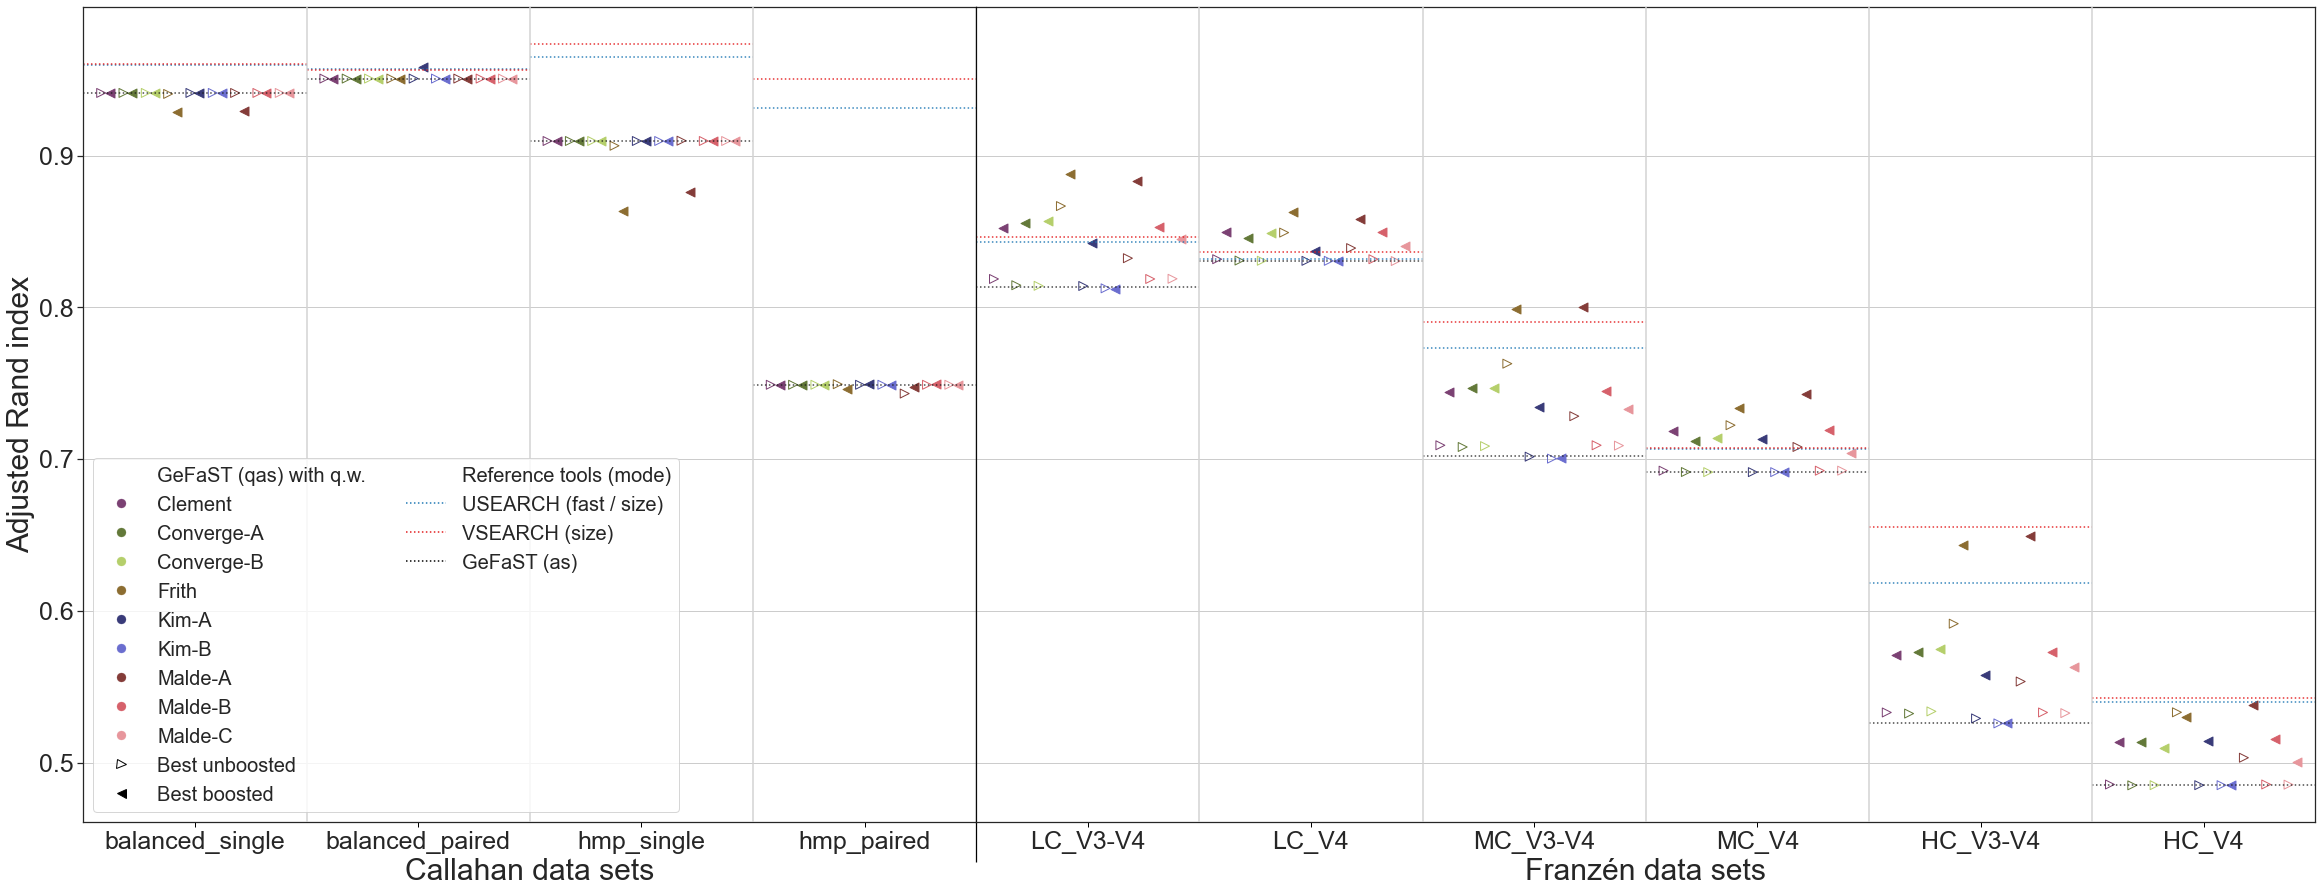

In [6]:
metric = 'adjrandindex'
comparative_plot_quality_selected([('Callahan data sets', df_callahan_gefast_joined_max_avg, df_callahan_uvsearch_joined_max_avg, 'callahan', ['balanced_single', 'balanced_paired', 'hmp_single', 'hmp_paired']), 
                                   ('Franzén data sets', df_franzen_gefast_joined_max_avg, df_franzen_uvsearch_joined_max_avg, 'franzen', ['LC_V3-V4', 'LC_V4', 'MC_V3-V4', 'MC_V4', 'HC_V3-V4', 'HC_V4'])], 
                                  metric, selected_modes, selected_variants)

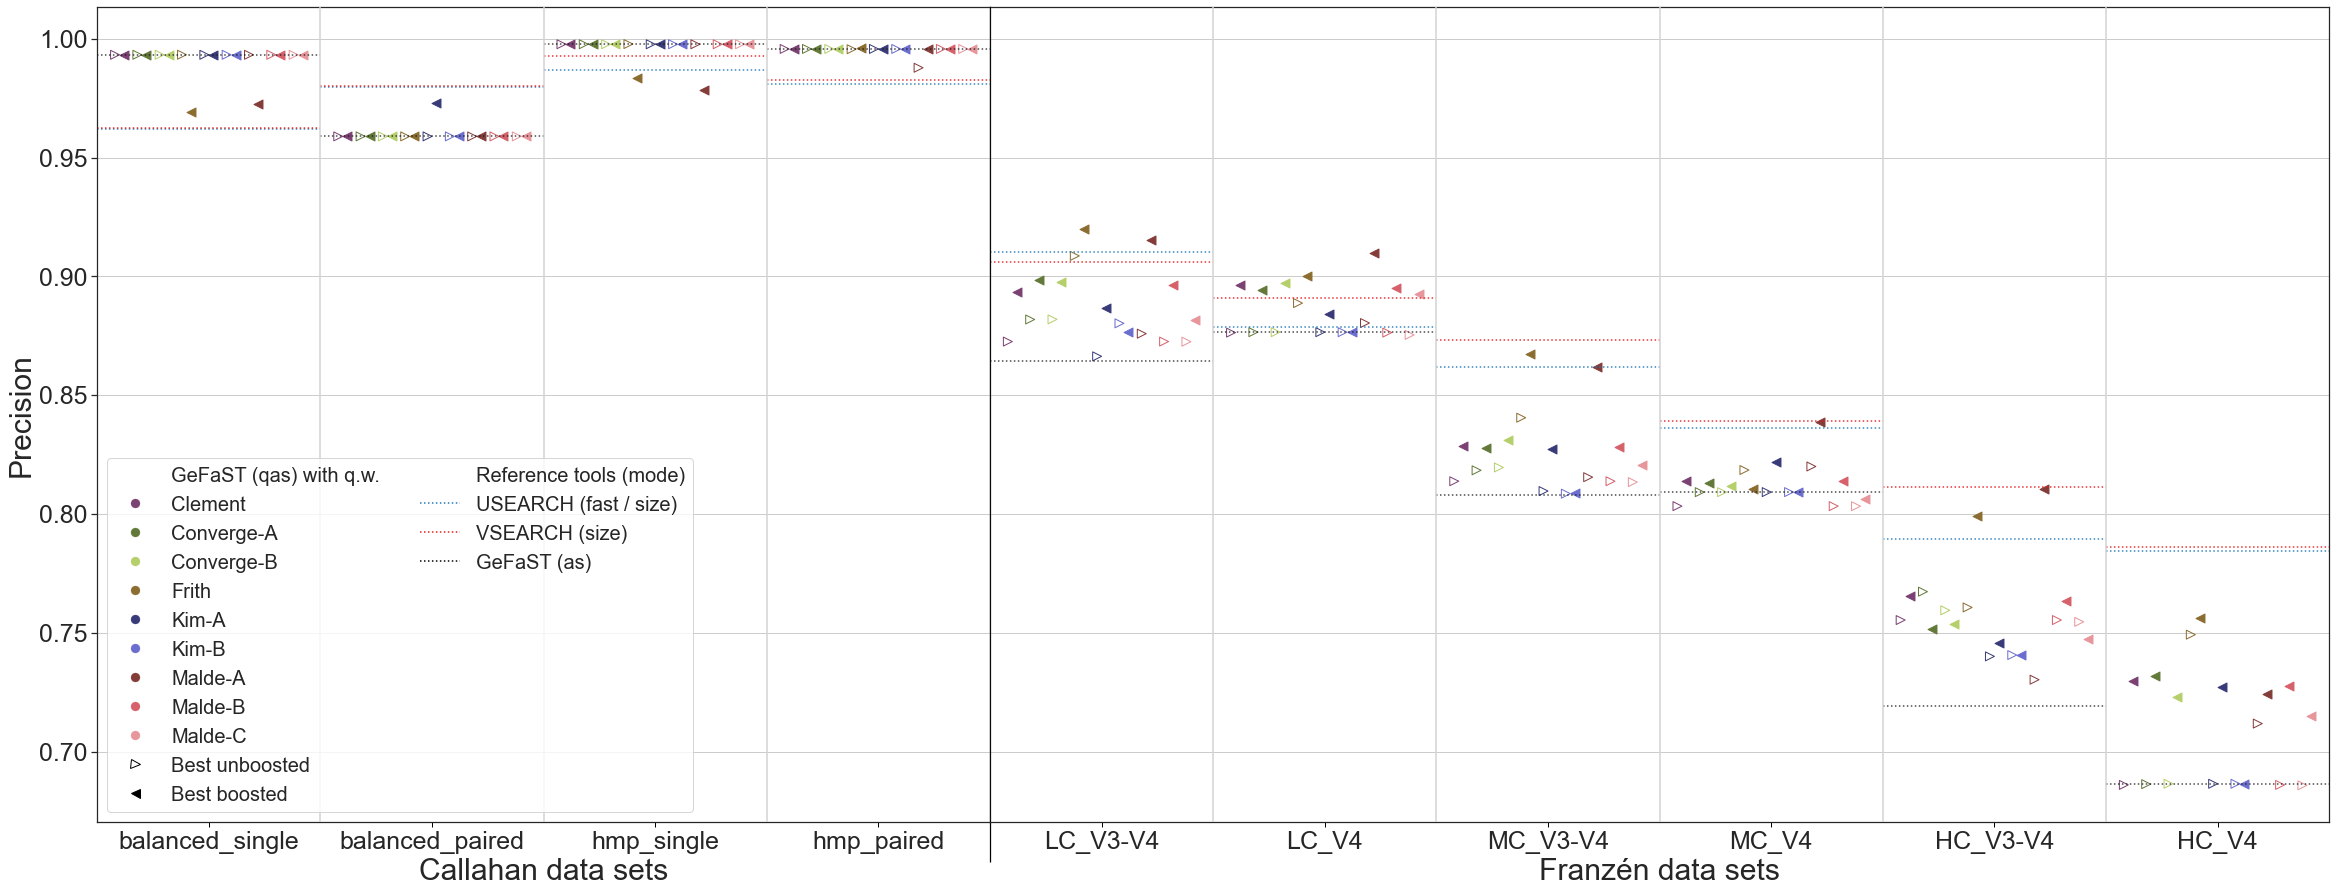

In [7]:
metric = 'precision'
comparative_plot_quality_selected([('Callahan data sets', df_callahan_gefast_joined_max_avg, df_callahan_uvsearch_joined_max_avg, 'callahan', ['balanced_single', 'balanced_paired', 'hmp_single', 'hmp_paired']), 
                                   ('Franzén data sets', df_franzen_gefast_joined_max_avg, df_franzen_uvsearch_joined_max_avg, 'franzen', ['LC_V3-V4', 'LC_V4', 'MC_V3-V4', 'MC_V4', 'HC_V3-V4', 'HC_V4'])], 
                                  metric, selected_modes, selected_variants)

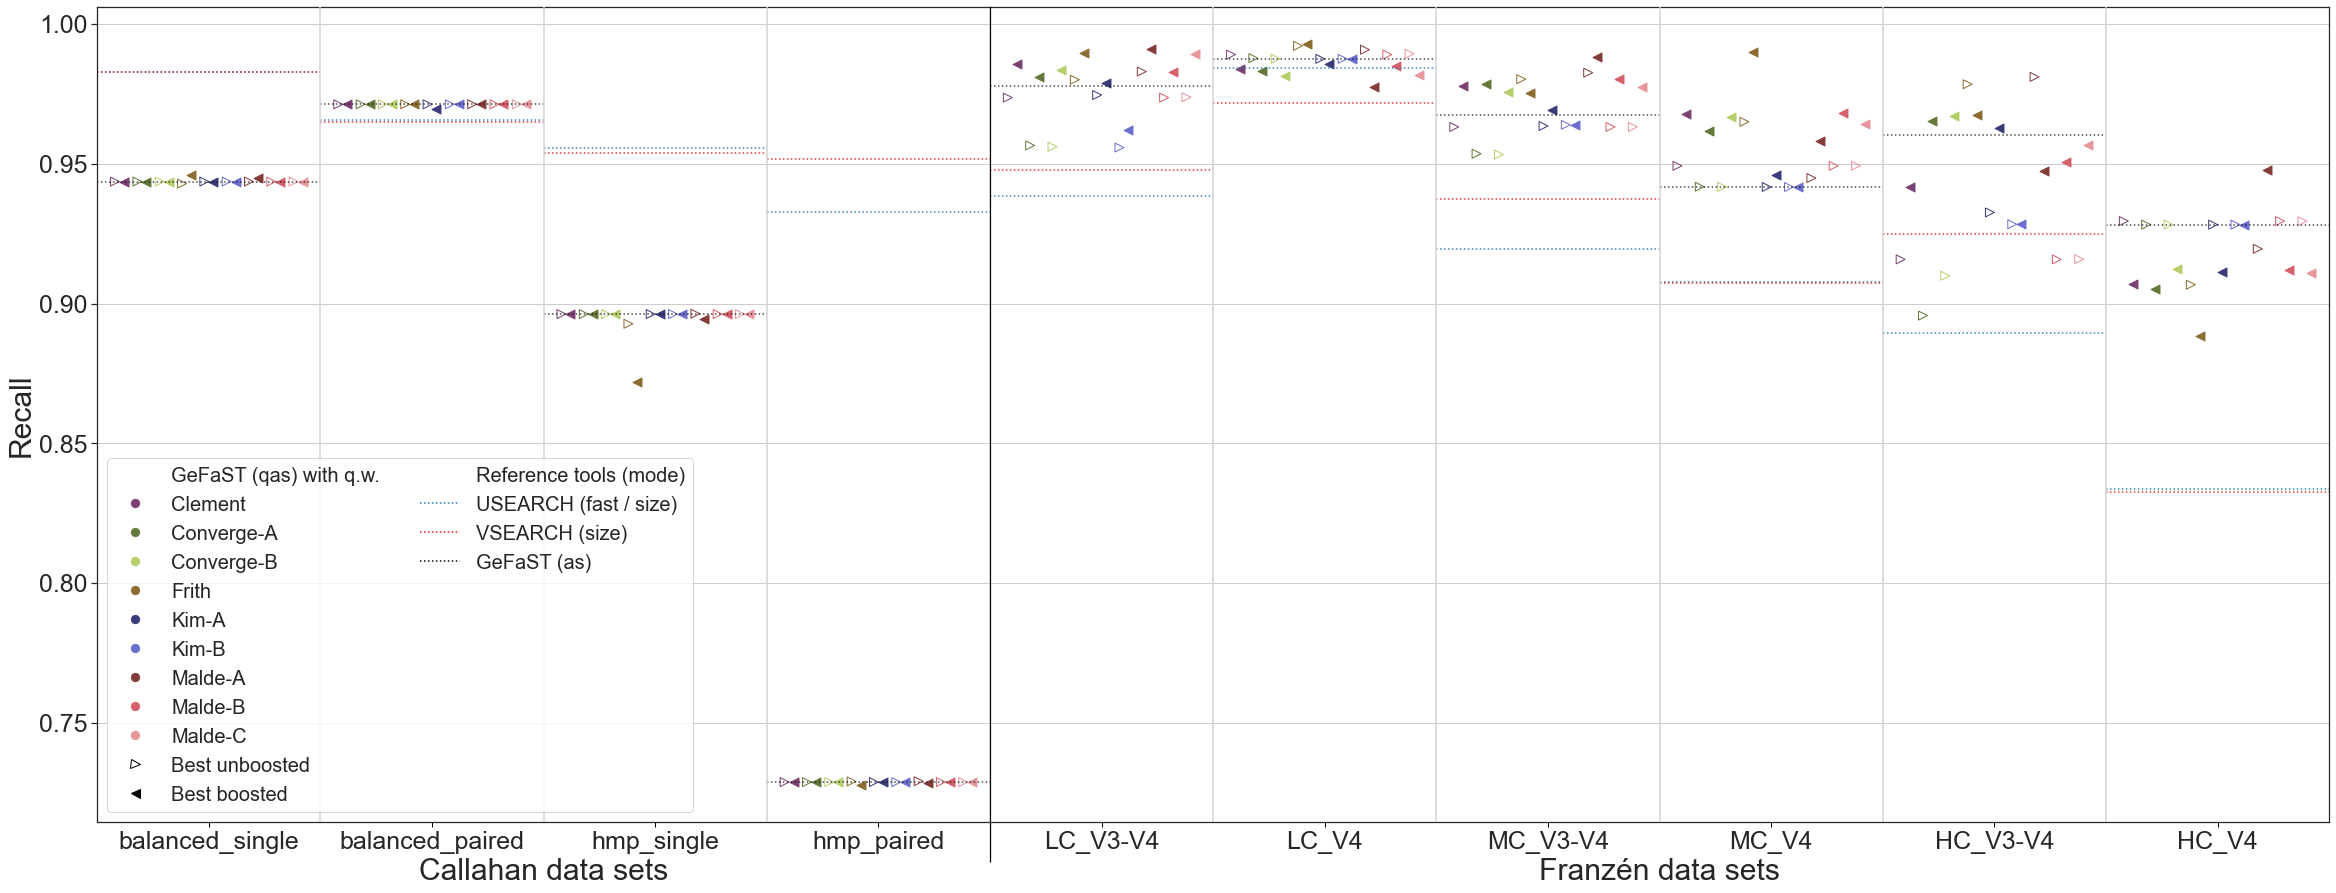

In [8]:
metric = 'recall'
comparative_plot_quality_selected([('Callahan data sets', df_callahan_gefast_joined_max_avg, df_callahan_uvsearch_joined_max_avg, 'callahan', ['balanced_single', 'balanced_paired', 'hmp_single', 'hmp_paired']), 
                                   ('Franzén data sets', df_franzen_gefast_joined_max_avg, df_franzen_uvsearch_joined_max_avg, 'franzen', ['LC_V3-V4', 'LC_V4', 'MC_V3-V4', 'MC_V4', 'HC_V3-V4', 'HC_V4'])], 
                                  metric, selected_modes, selected_variants)

**Average clustering quality**

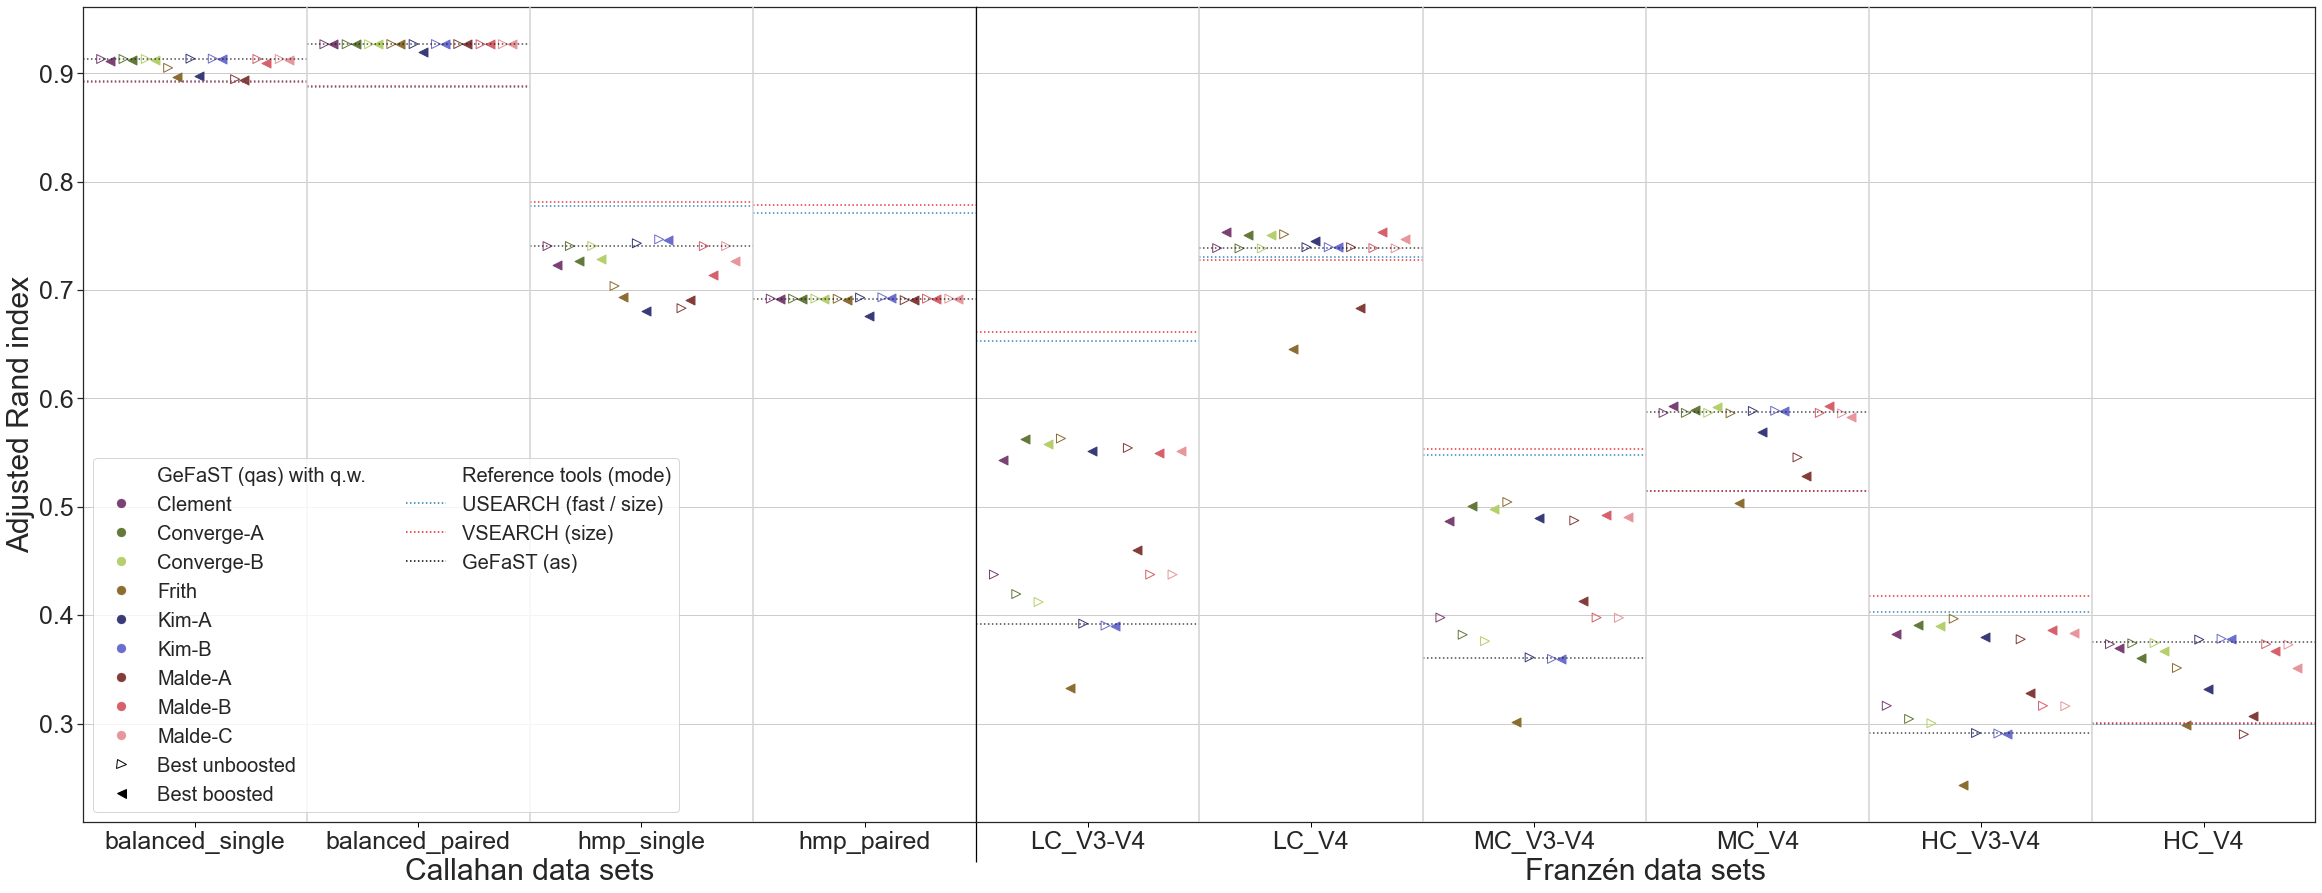

In [9]:
metric = 'adjrandindex'
comparative_plot_quality_selected([('Callahan data sets', df_callahan_gefast_joined_mean_avg, df_callahan_uvsearch_joined_mean_avg, 'callahan', ['balanced_single', 'balanced_paired', 'hmp_single', 'hmp_paired']), 
                                   ('Franzén data sets', df_franzen_gefast_joined_mean_avg, df_franzen_uvsearch_joined_mean_avg, 'franzen', ['LC_V3-V4', 'LC_V4', 'MC_V3-V4', 'MC_V4', 'HC_V3-V4', 'HC_V4'])], 
                                  metric, selected_modes, selected_variants)

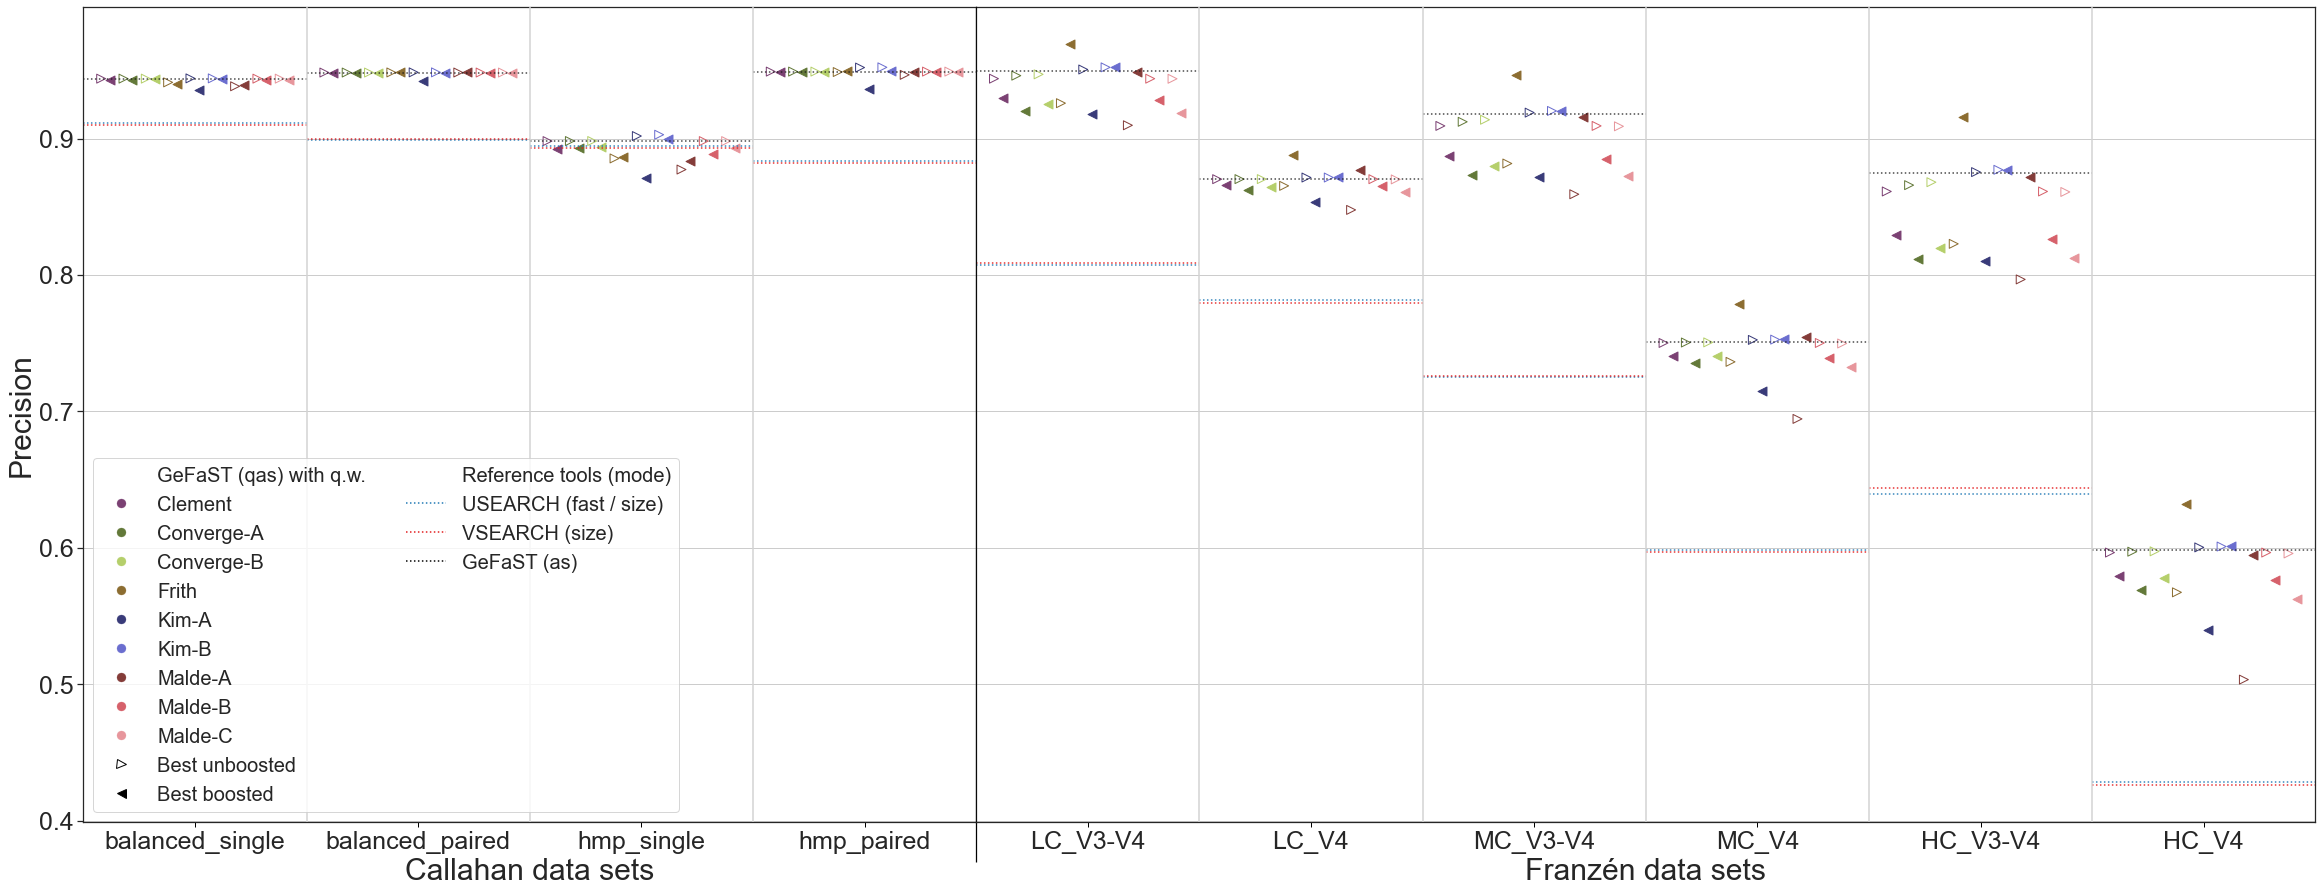

In [10]:
metric = 'precision'
comparative_plot_quality_selected([('Callahan data sets', df_callahan_gefast_joined_mean_avg, df_callahan_uvsearch_joined_mean_avg, 'callahan', ['balanced_single', 'balanced_paired', 'hmp_single', 'hmp_paired']), 
                                   ('Franzén data sets', df_franzen_gefast_joined_mean_avg, df_franzen_uvsearch_joined_mean_avg, 'franzen', ['LC_V3-V4', 'LC_V4', 'MC_V3-V4', 'MC_V4', 'HC_V3-V4', 'HC_V4'])], 
                                  metric, selected_modes, selected_variants)

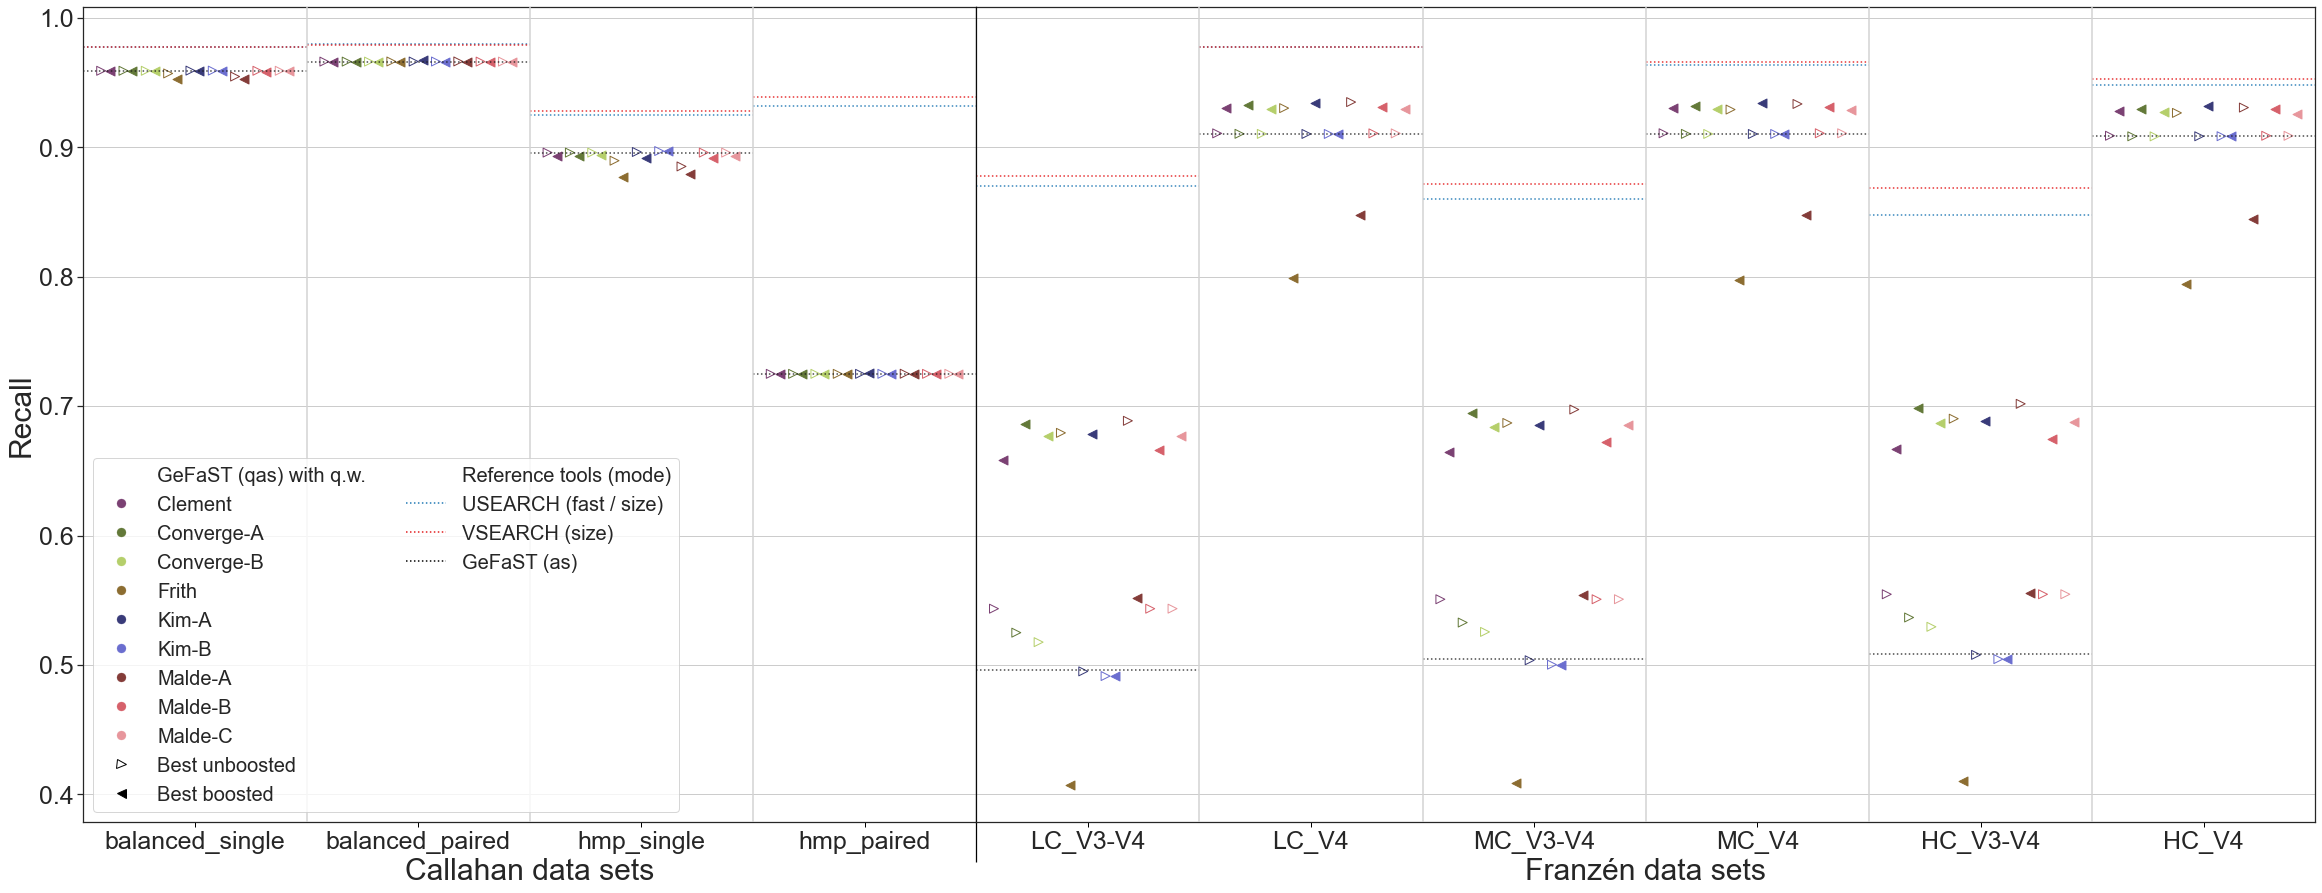

In [11]:
metric = 'recall'
comparative_plot_quality_selected([('Callahan data sets', df_callahan_gefast_joined_mean_avg, df_callahan_uvsearch_joined_mean_avg, 'callahan', ['balanced_single', 'balanced_paired', 'hmp_single', 'hmp_paired']), 
                                   ('Franzén data sets', df_franzen_gefast_joined_mean_avg, df_franzen_uvsearch_joined_mean_avg, 'franzen', ['LC_V3-V4', 'LC_V4', 'MC_V3-V4', 'MC_V4', 'HC_V3-V4', 'HC_V4'])], 
                                  metric, selected_modes, selected_variants)

**N-best average clustering quality**

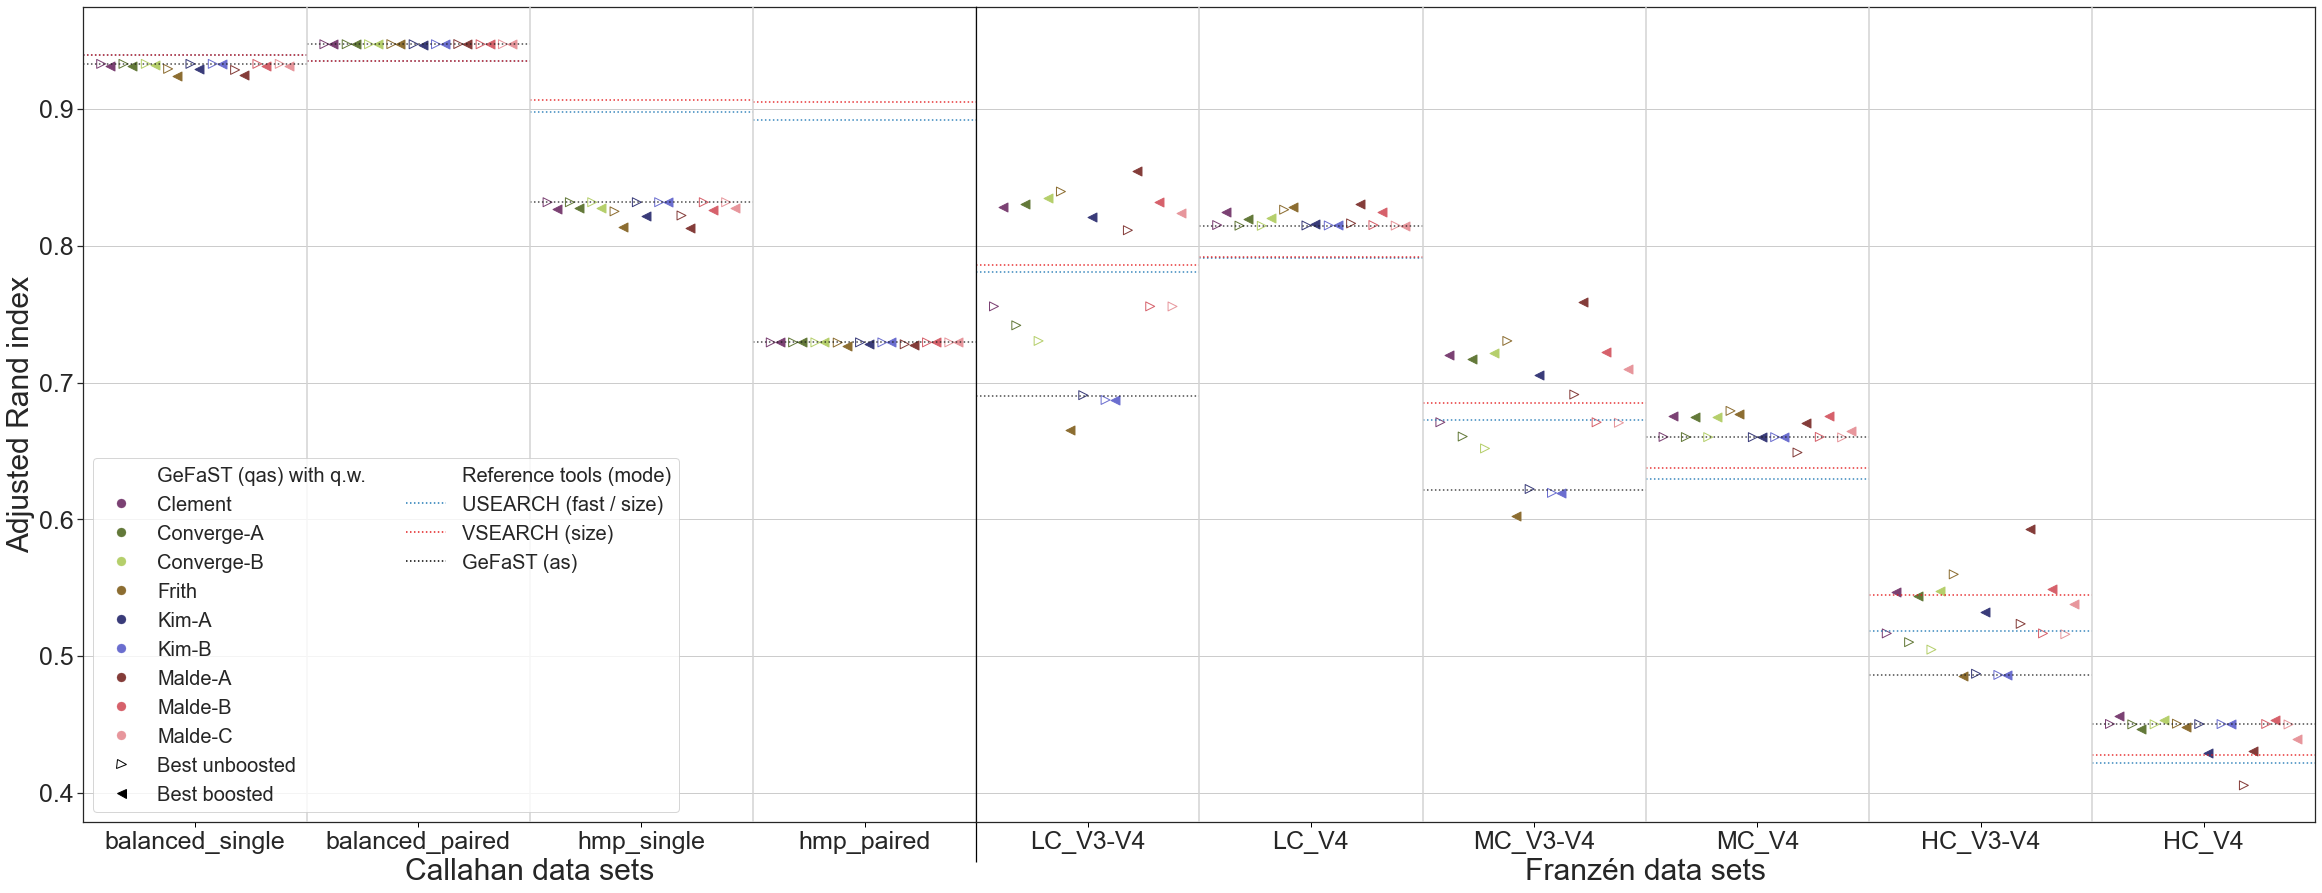

In [12]:
metric = 'adjrandindex'
comparative_plot_quality_selected([('Callahan data sets', df_callahan_gefast_joined_nbest_avg, df_callahan_uvsearch_joined_nbest_avg, 'callahan', ['balanced_single', 'balanced_paired', 'hmp_single', 'hmp_paired']), 
                                   ('Franzén data sets', df_franzen_gefast_joined_nbest_avg, df_franzen_uvsearch_joined_nbest_avg, 'franzen', ['LC_V3-V4', 'LC_V4', 'MC_V3-V4', 'MC_V4', 'HC_V3-V4', 'HC_V4'])], 
                                  metric, selected_modes, selected_variants)

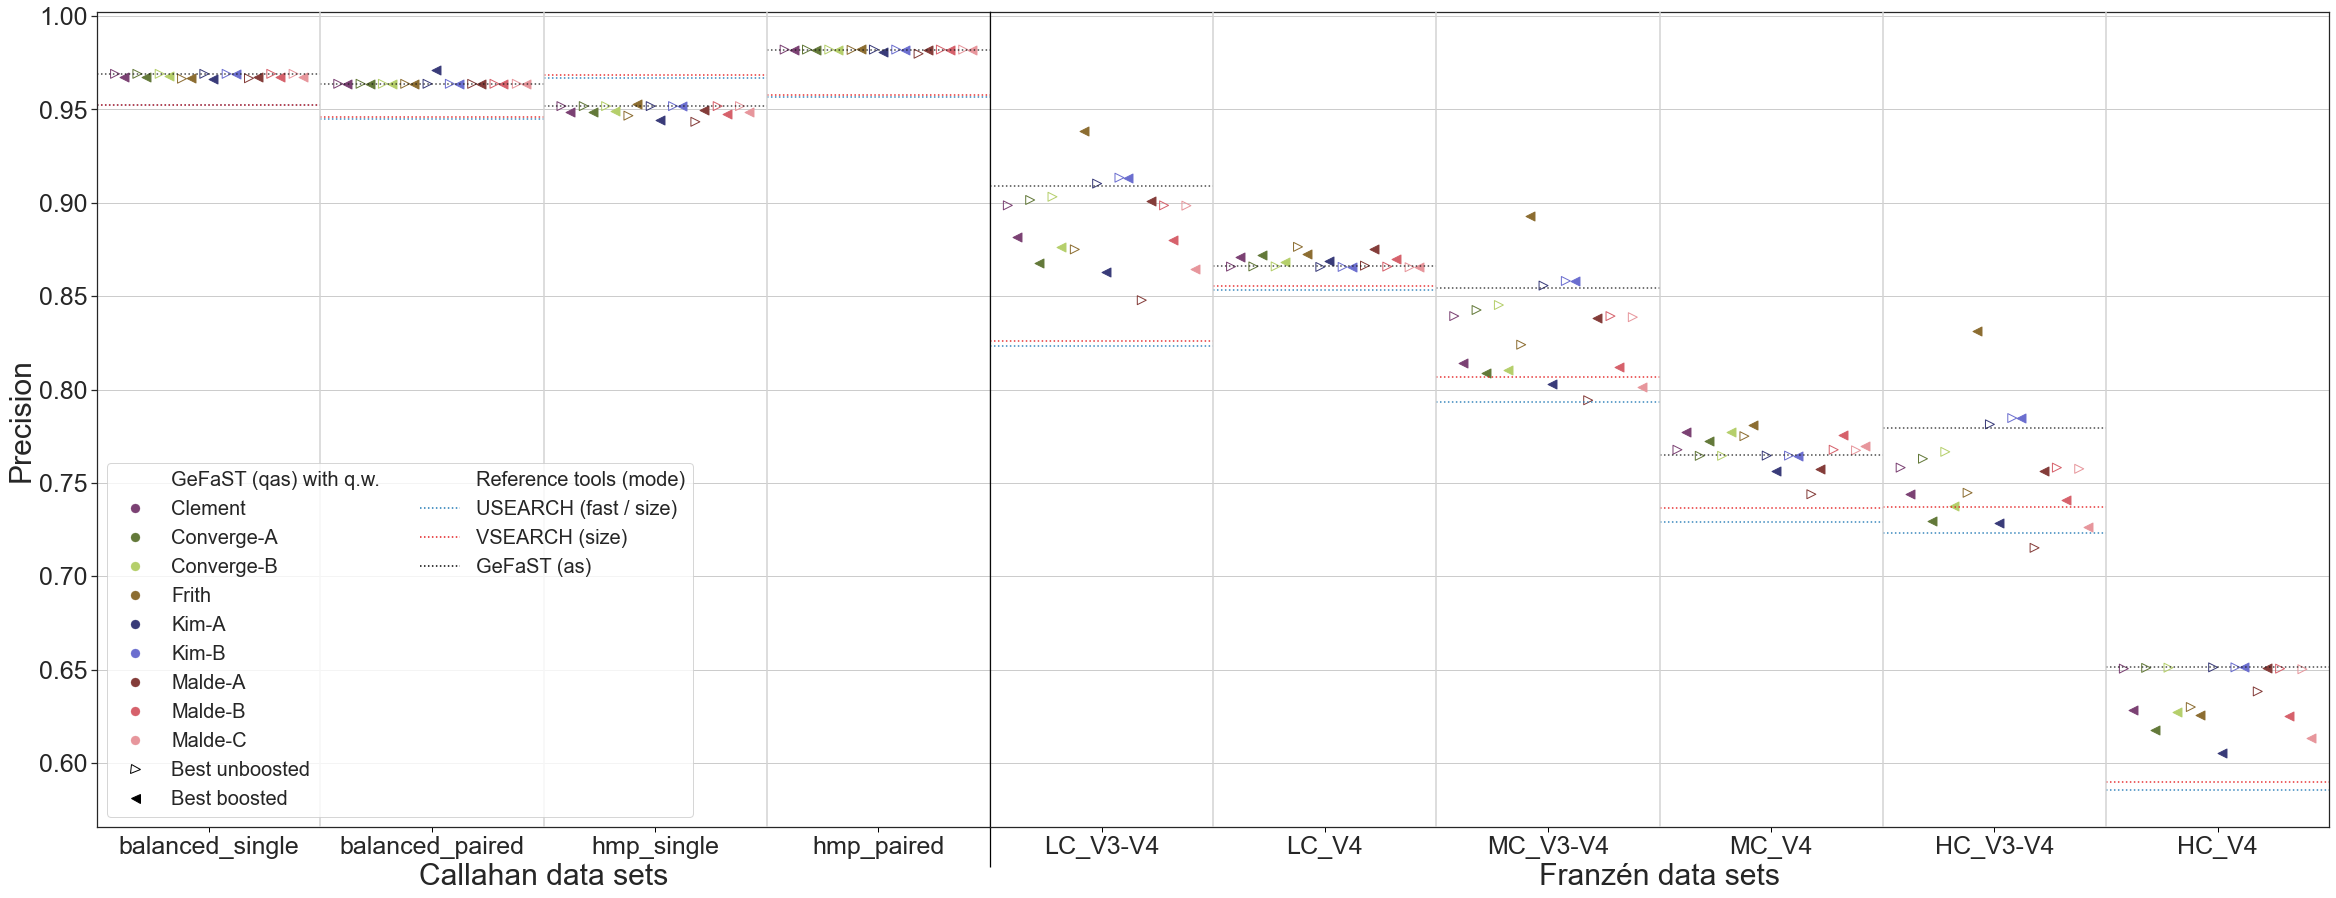

In [13]:
metric = 'precision'
comparative_plot_quality_selected([('Callahan data sets', df_callahan_gefast_joined_nbest_avg, df_callahan_uvsearch_joined_nbest_avg, 'callahan', ['balanced_single', 'balanced_paired', 'hmp_single', 'hmp_paired']), 
                                   ('Franzén data sets', df_franzen_gefast_joined_nbest_avg, df_franzen_uvsearch_joined_nbest_avg, 'franzen', ['LC_V3-V4', 'LC_V4', 'MC_V3-V4', 'MC_V4', 'HC_V3-V4', 'HC_V4'])], 
                                  metric, selected_modes, selected_variants)

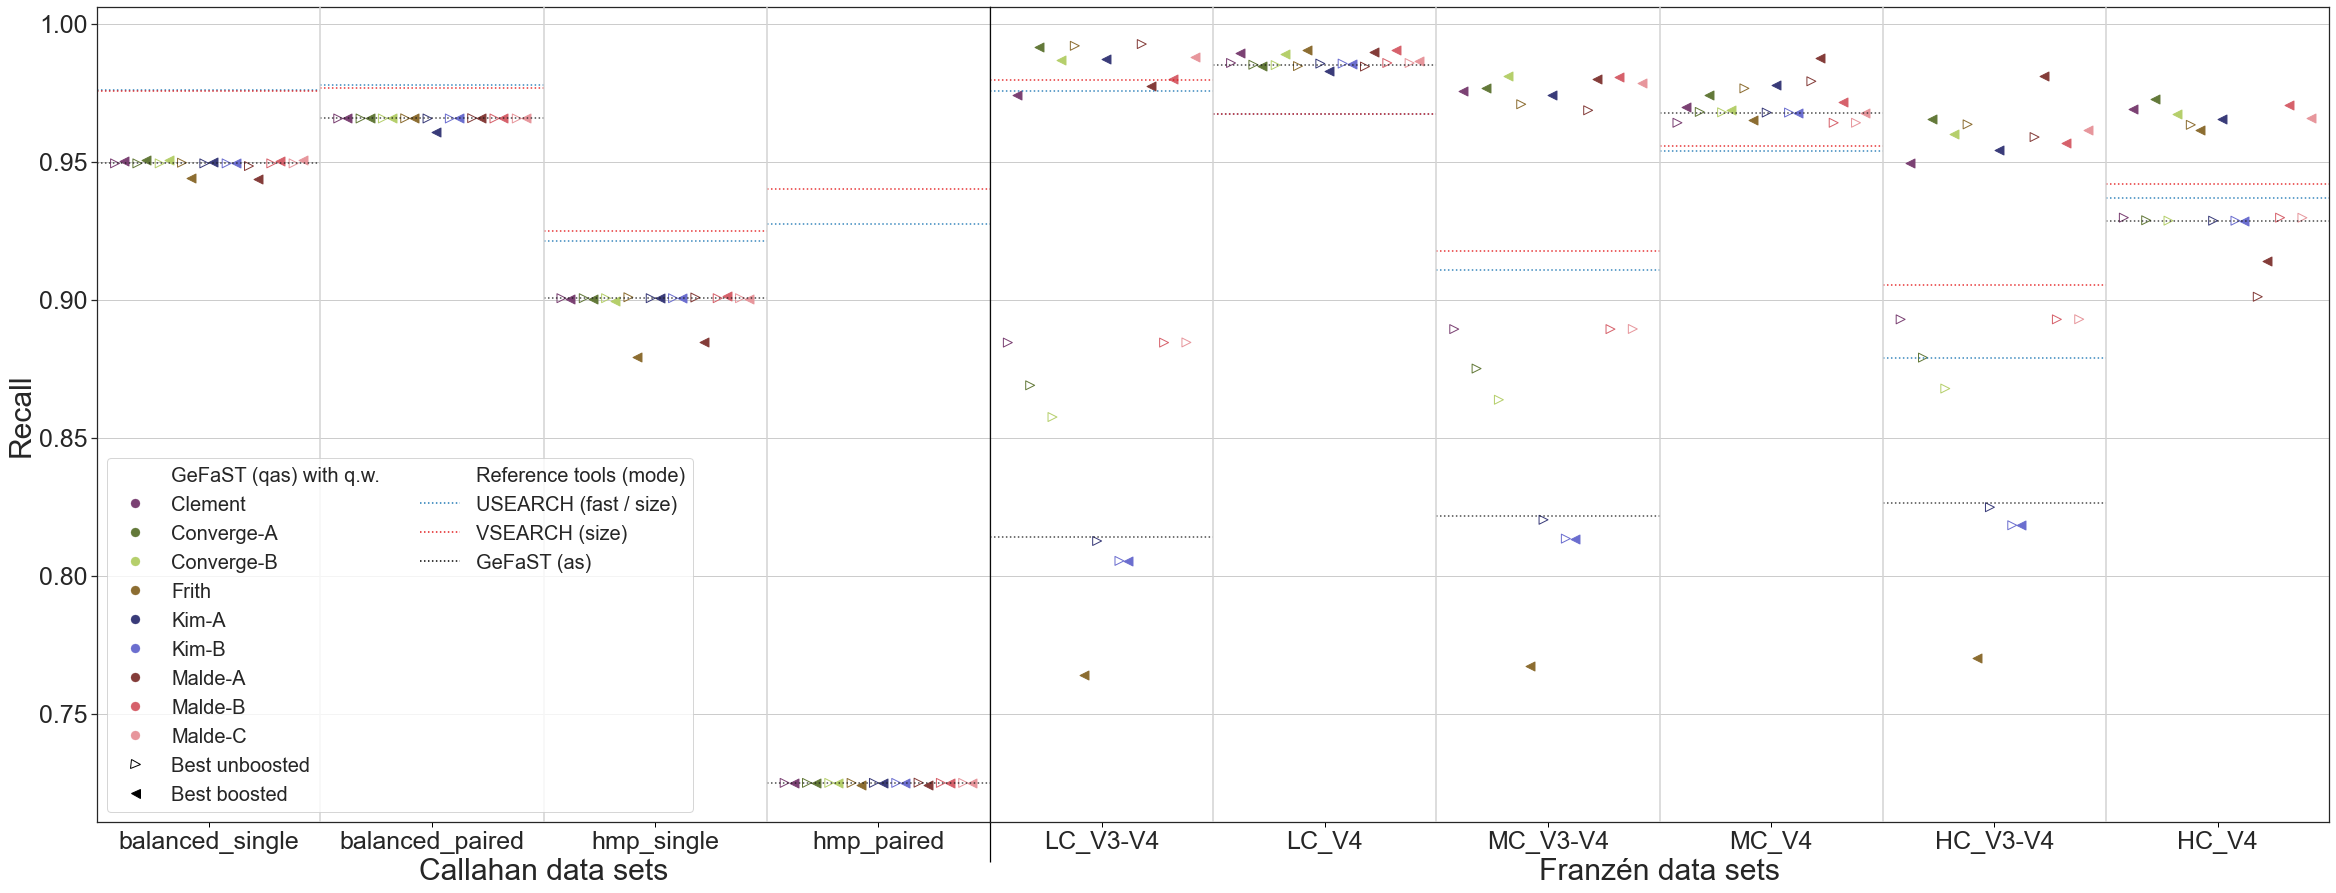

In [14]:
metric = 'recall'
comparative_plot_quality_selected([('Callahan data sets', df_callahan_gefast_joined_nbest_avg, df_callahan_uvsearch_joined_nbest_avg, 'callahan', ['balanced_single', 'balanced_paired', 'hmp_single', 'hmp_paired']), 
                                   ('Franzén data sets', df_franzen_gefast_joined_nbest_avg, df_franzen_uvsearch_joined_nbest_avg, 'franzen', ['LC_V3-V4', 'LC_V4', 'MC_V3-V4', 'MC_V4', 'HC_V3-V4', 'HC_V4'])], 
                                  metric, selected_modes, selected_variants)

### Levenshtein mode and quality Levenshtein mode

In [15]:
selected_variants = [('c', 'v1', 'mult', '1000', 'mw'), 
                     ('ca', 'v3', 'mult', '1000', 'mw'), 
                     ('cb', 'v3', 'mult', '1000', 'mw'), 
                     ('f', 'v3', 'linear', '0', 'mw'), 
                     ('ka', 'v1', 'root', '10', 'mw'), 
                     ('kb', 'v1', 'root', '10', 'mw'), 
                     ('ma', 'v3', 'mult', '100', 'mw'), 
                     ('mb', 'v1', 'mult', '1000', 'mw'),
                     ('mc', 'v1', 'rootshift', '8', 'mw')]

selected_modes = ('lev', 'qlev')

**Maximum clustering quality**

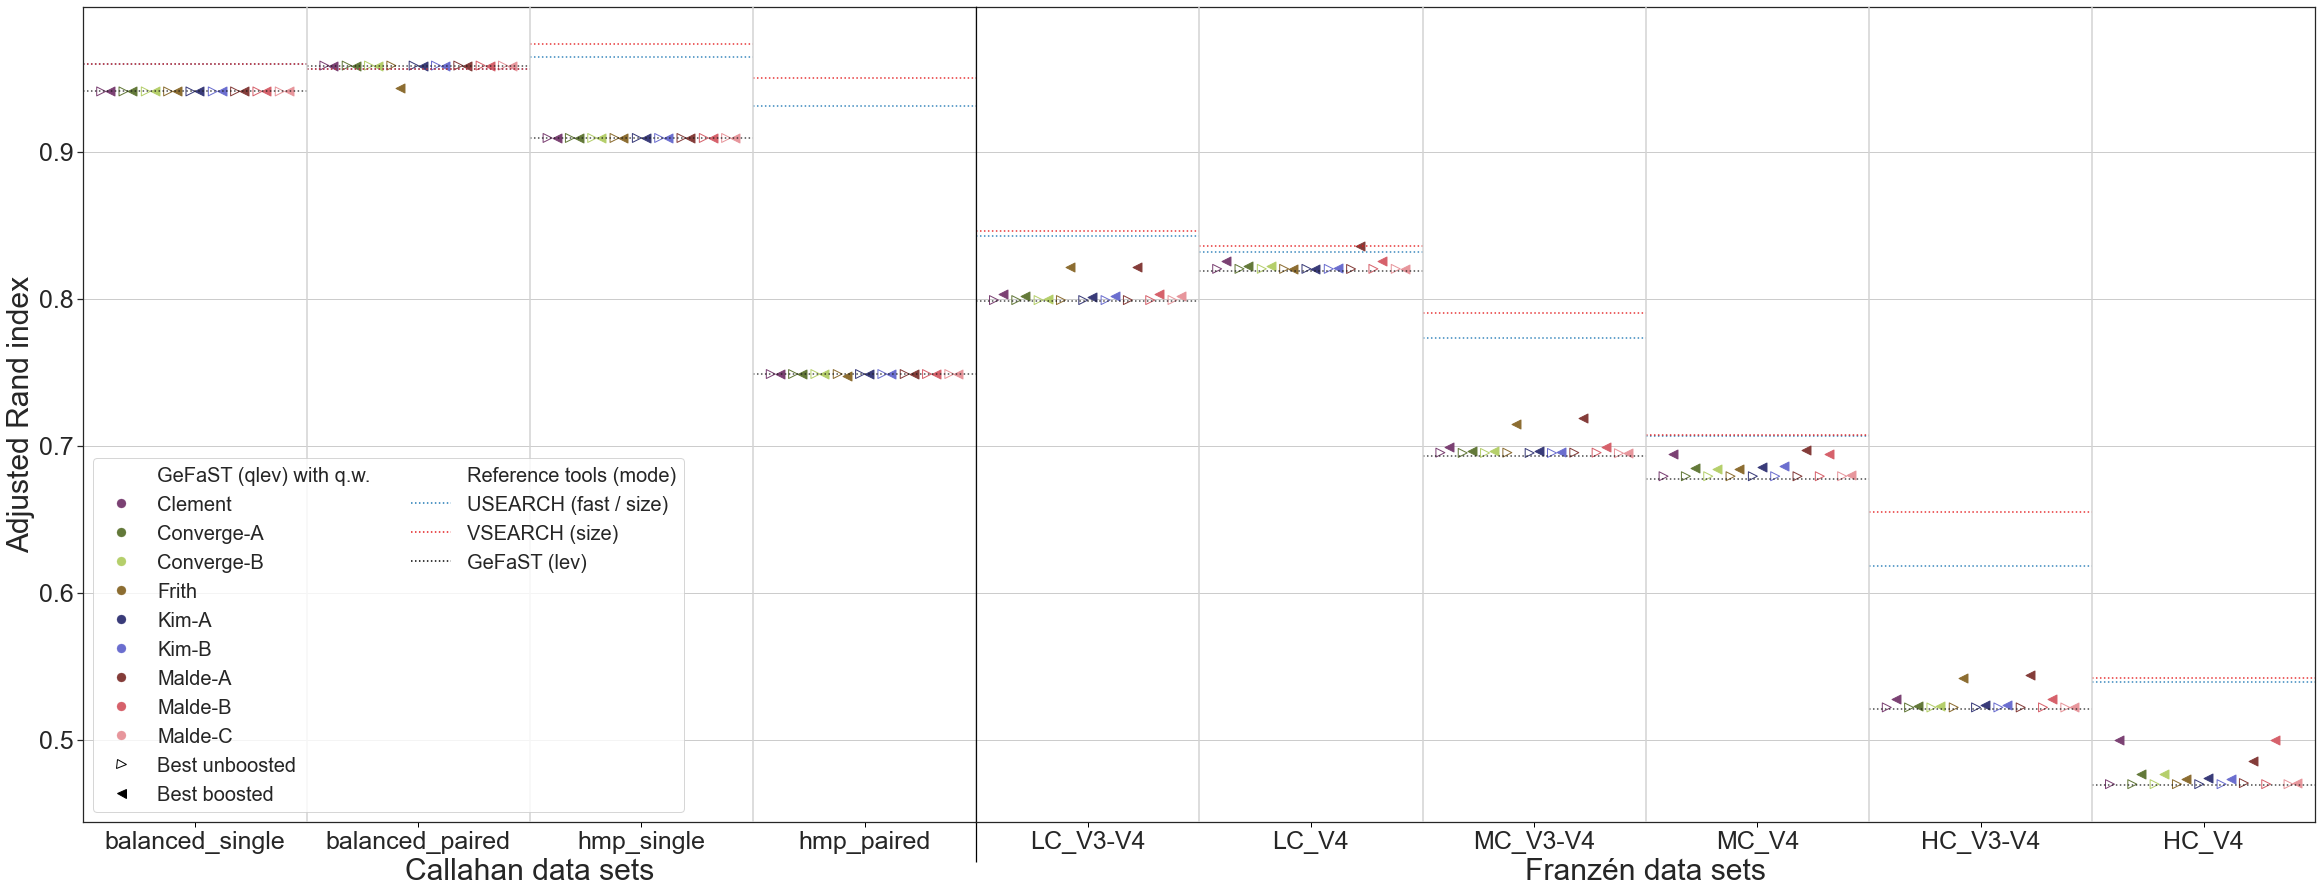

In [16]:
metric = 'adjrandindex'
comparative_plot_quality_selected([('Callahan data sets', df_callahan_gefast_joined_max_avg, df_callahan_uvsearch_joined_max_avg, 'callahan', ['balanced_single', 'balanced_paired', 'hmp_single', 'hmp_paired']), 
                                   ('Franzén data sets', df_franzen_gefast_joined_max_avg, df_franzen_uvsearch_joined_max_avg, 'franzen', ['LC_V3-V4', 'LC_V4', 'MC_V3-V4', 'MC_V4', 'HC_V3-V4', 'HC_V4'])], 
                                  metric, selected_modes, selected_variants)

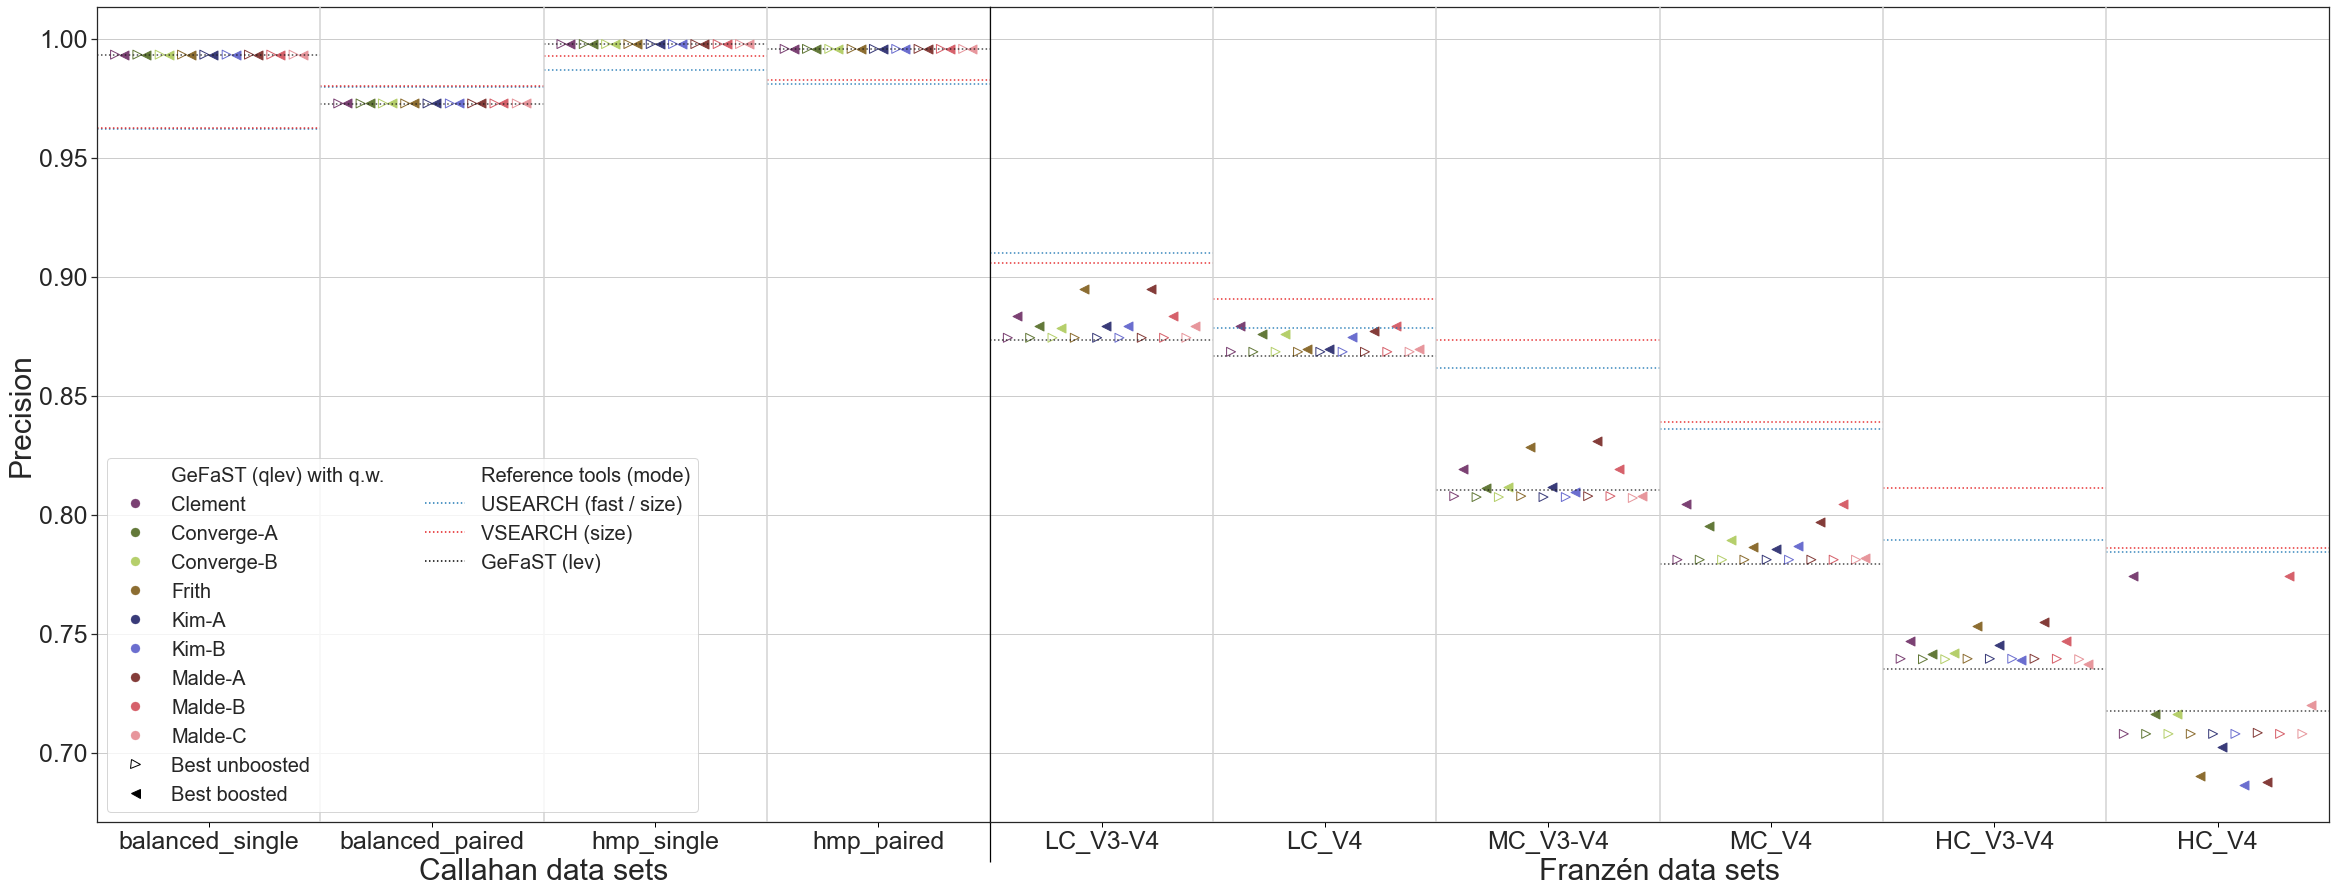

In [17]:
metric = 'precision'
comparative_plot_quality_selected([('Callahan data sets', df_callahan_gefast_joined_max_avg, df_callahan_uvsearch_joined_max_avg, 'callahan', ['balanced_single', 'balanced_paired', 'hmp_single', 'hmp_paired']), 
                                   ('Franzén data sets', df_franzen_gefast_joined_max_avg, df_franzen_uvsearch_joined_max_avg, 'franzen', ['LC_V3-V4', 'LC_V4', 'MC_V3-V4', 'MC_V4', 'HC_V3-V4', 'HC_V4'])], 
                                  metric, selected_modes, selected_variants)

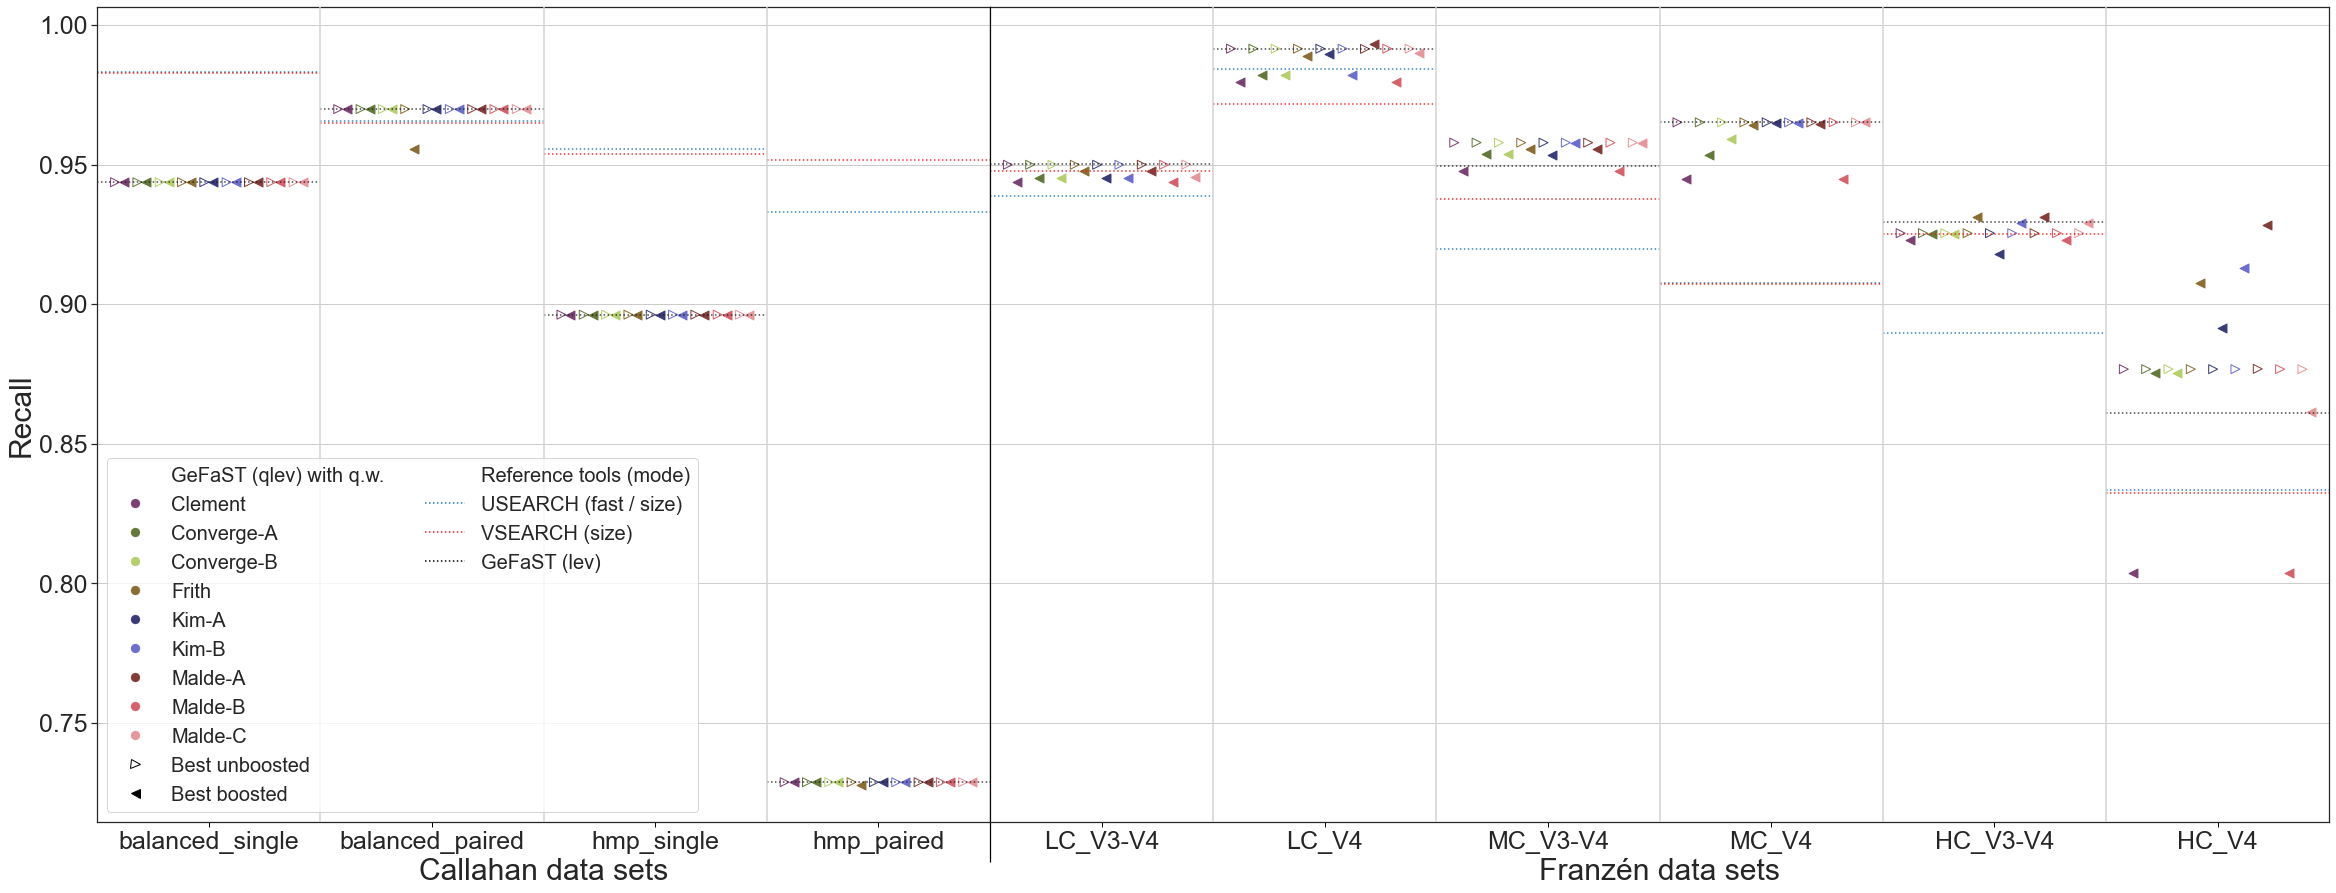

In [18]:
metric = 'recall'
comparative_plot_quality_selected([('Callahan data sets', df_callahan_gefast_joined_max_avg, df_callahan_uvsearch_joined_max_avg, 'callahan', ['balanced_single', 'balanced_paired', 'hmp_single', 'hmp_paired']), 
                                   ('Franzén data sets', df_franzen_gefast_joined_max_avg, df_franzen_uvsearch_joined_max_avg, 'franzen', ['LC_V3-V4', 'LC_V4', 'MC_V3-V4', 'MC_V4', 'HC_V3-V4', 'HC_V4'])], 
                                  metric, selected_modes, selected_variants)

**Average clustering quality**

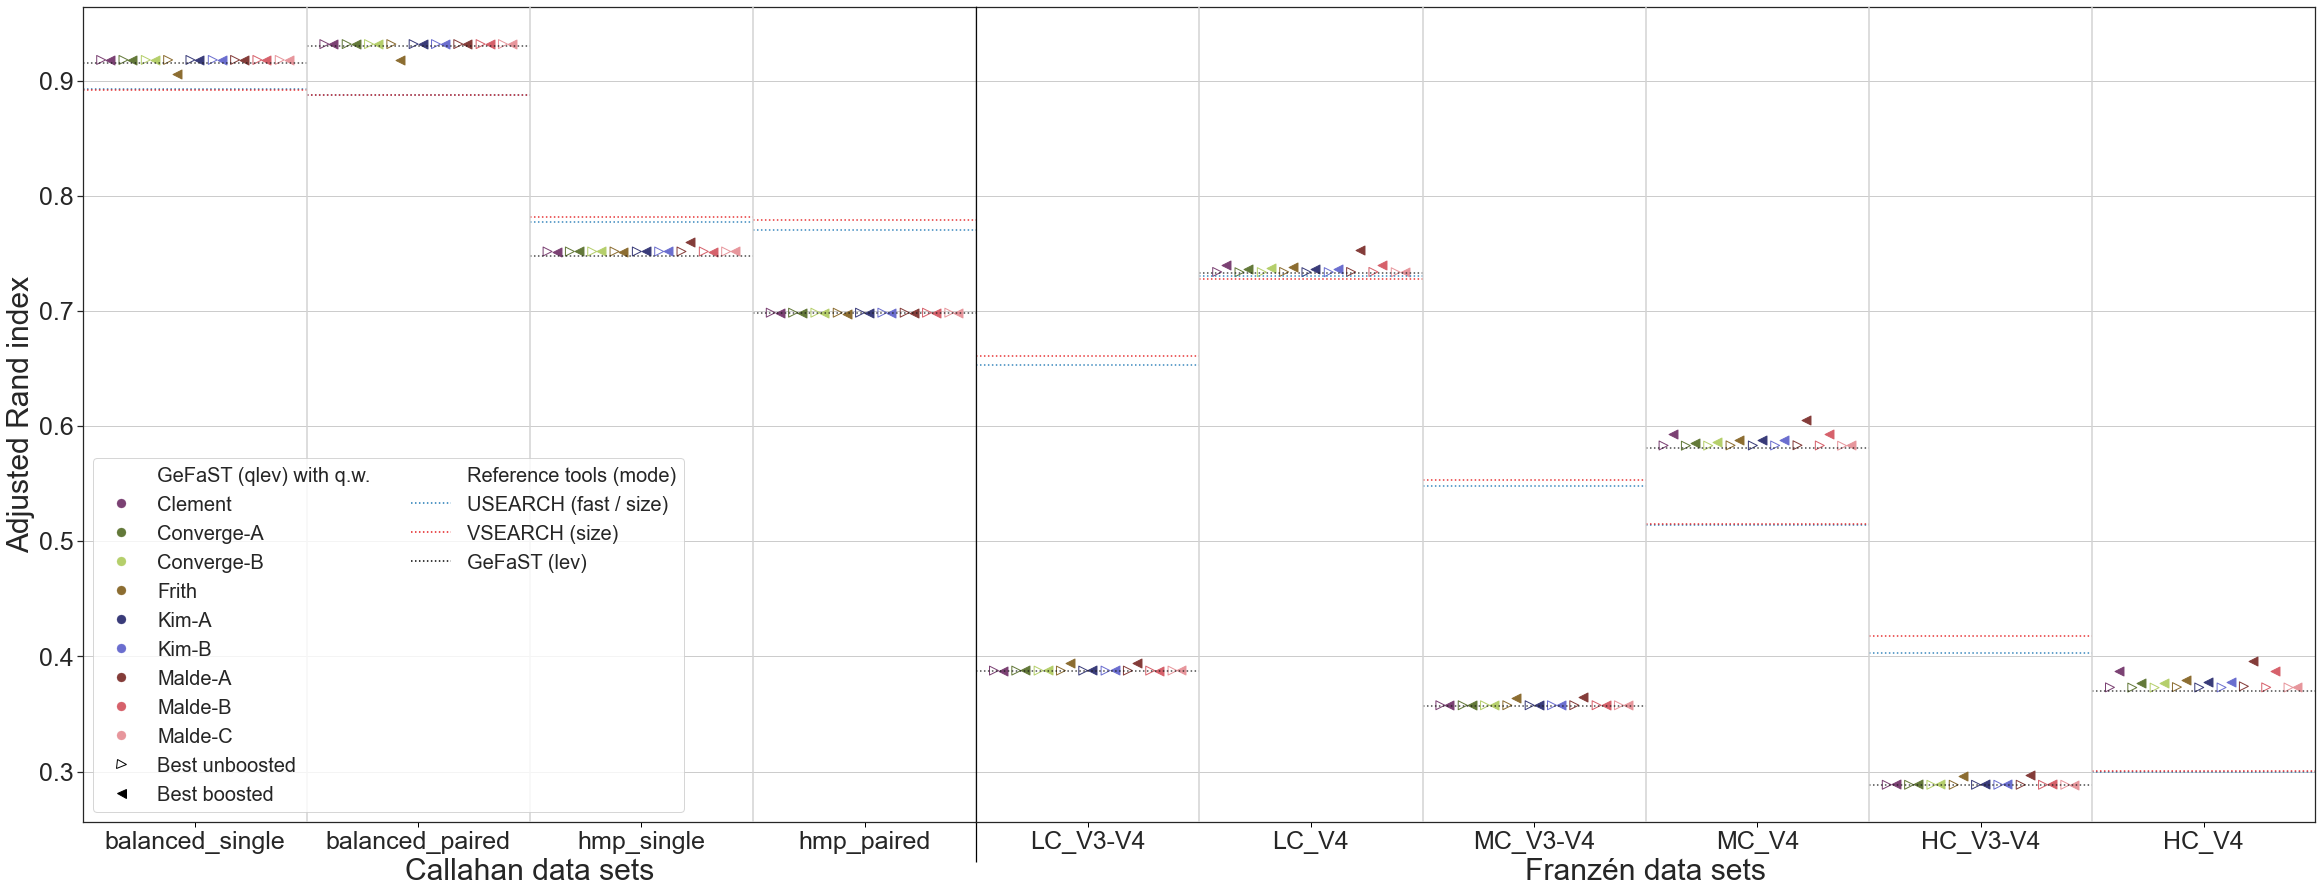

In [19]:
metric = 'adjrandindex'
comparative_plot_quality_selected([('Callahan data sets', df_callahan_gefast_joined_mean_avg, df_callahan_uvsearch_joined_mean_avg, 'callahan', ['balanced_single', 'balanced_paired', 'hmp_single', 'hmp_paired']), 
                                   ('Franzén data sets', df_franzen_gefast_joined_mean_avg, df_franzen_uvsearch_joined_mean_avg, 'franzen', ['LC_V3-V4', 'LC_V4', 'MC_V3-V4', 'MC_V4', 'HC_V3-V4', 'HC_V4'])], 
                                  metric, selected_modes, selected_variants)

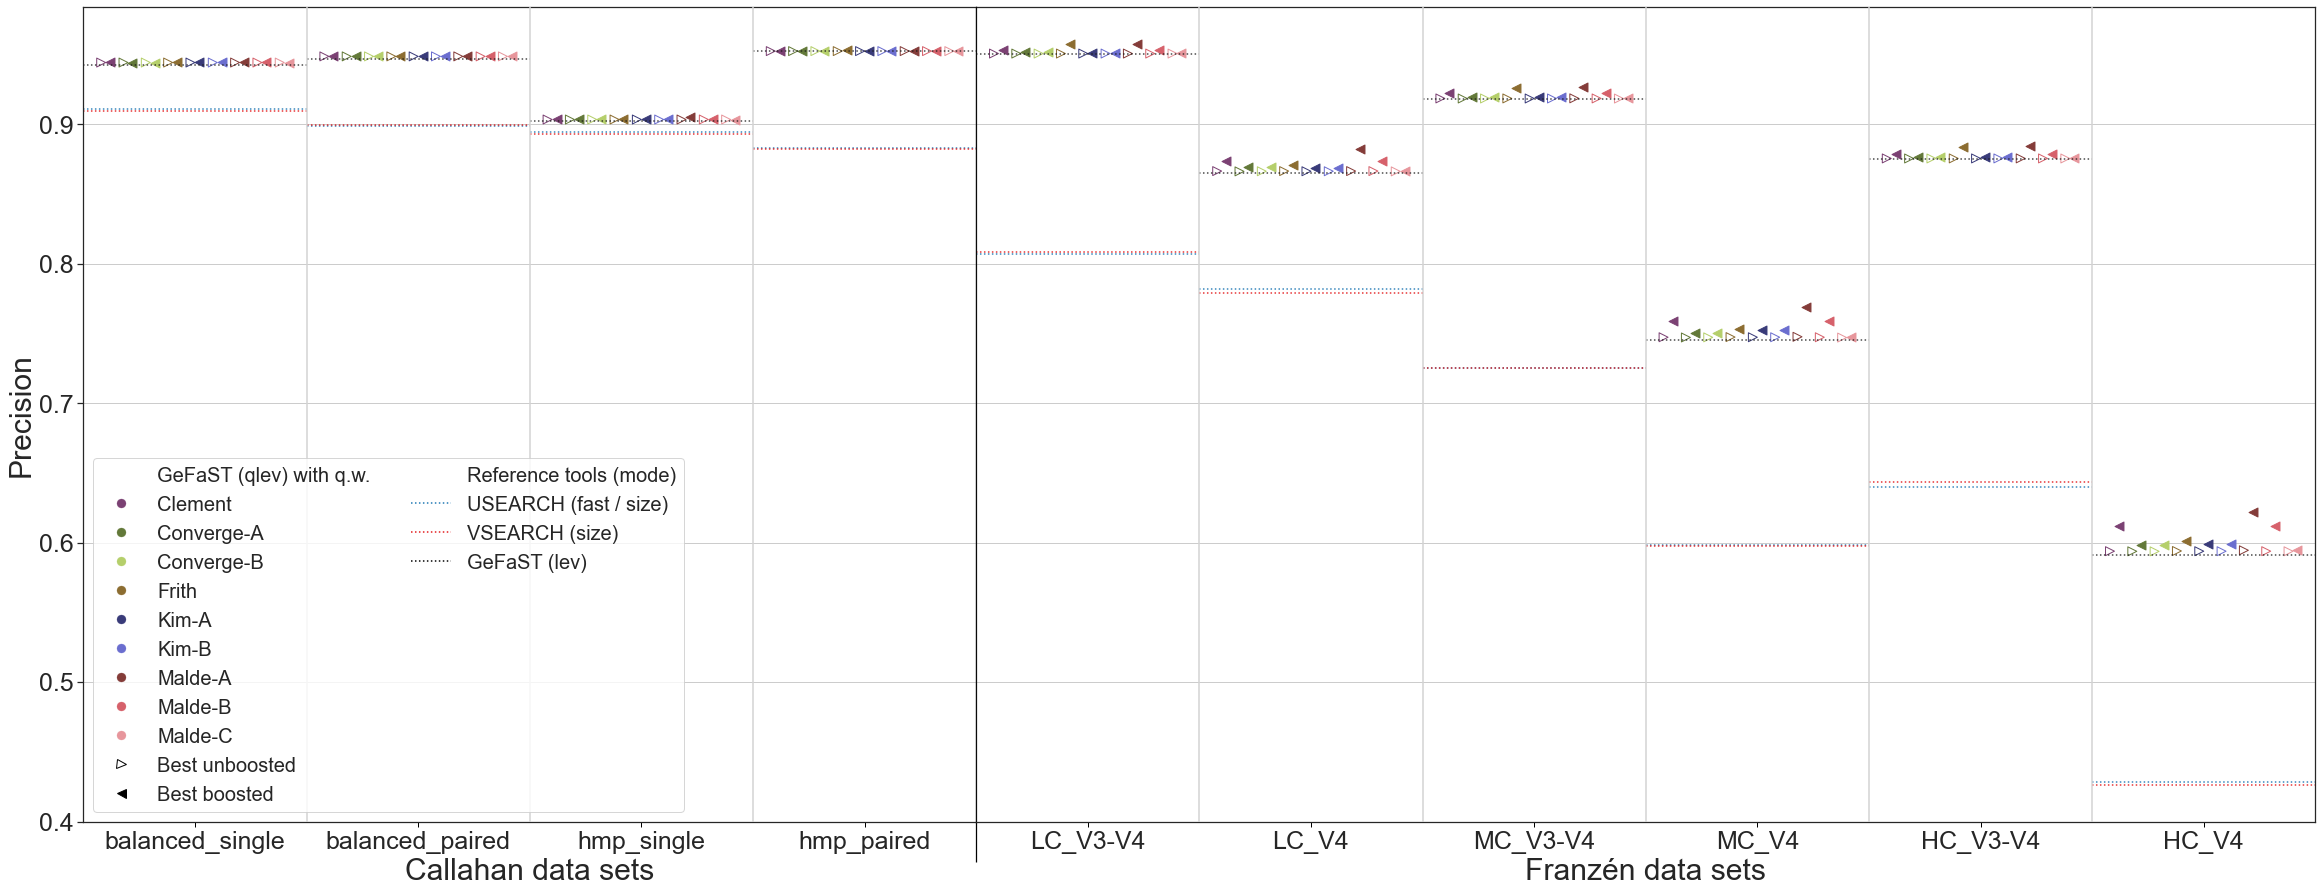

In [20]:
metric = 'precision'
comparative_plot_quality_selected([('Callahan data sets', df_callahan_gefast_joined_mean_avg, df_callahan_uvsearch_joined_mean_avg, 'callahan', ['balanced_single', 'balanced_paired', 'hmp_single', 'hmp_paired']), 
                                   ('Franzén data sets', df_franzen_gefast_joined_mean_avg, df_franzen_uvsearch_joined_mean_avg, 'franzen', ['LC_V3-V4', 'LC_V4', 'MC_V3-V4', 'MC_V4', 'HC_V3-V4', 'HC_V4'])], 
                                  metric, selected_modes, selected_variants)

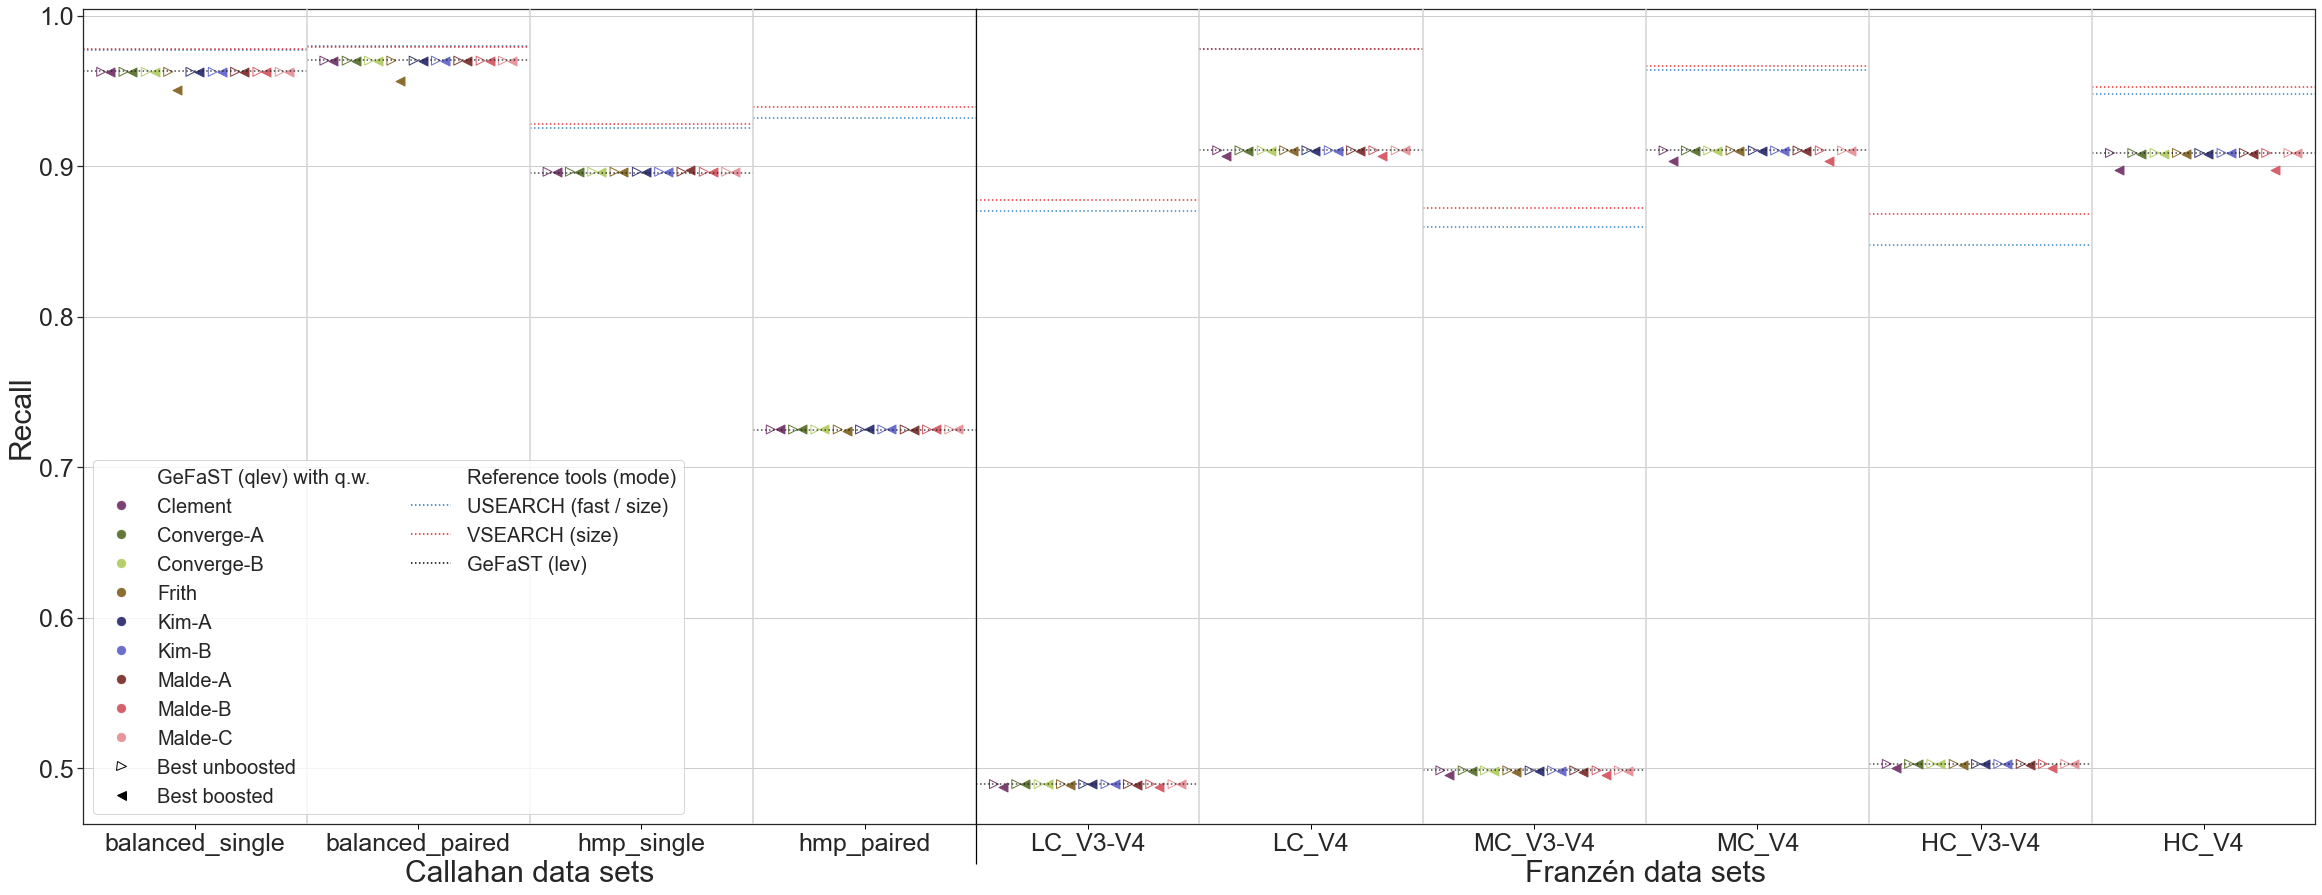

In [21]:
metric = 'recall'
comparative_plot_quality_selected([('Callahan data sets', df_callahan_gefast_joined_mean_avg, df_callahan_uvsearch_joined_mean_avg, 'callahan', ['balanced_single', 'balanced_paired', 'hmp_single', 'hmp_paired']), 
                                   ('Franzén data sets', df_franzen_gefast_joined_mean_avg, df_franzen_uvsearch_joined_mean_avg, 'franzen', ['LC_V3-V4', 'LC_V4', 'MC_V3-V4', 'MC_V4', 'HC_V3-V4', 'HC_V4'])], 
                                  metric, selected_modes, selected_variants)

**N-best average clustering quality**

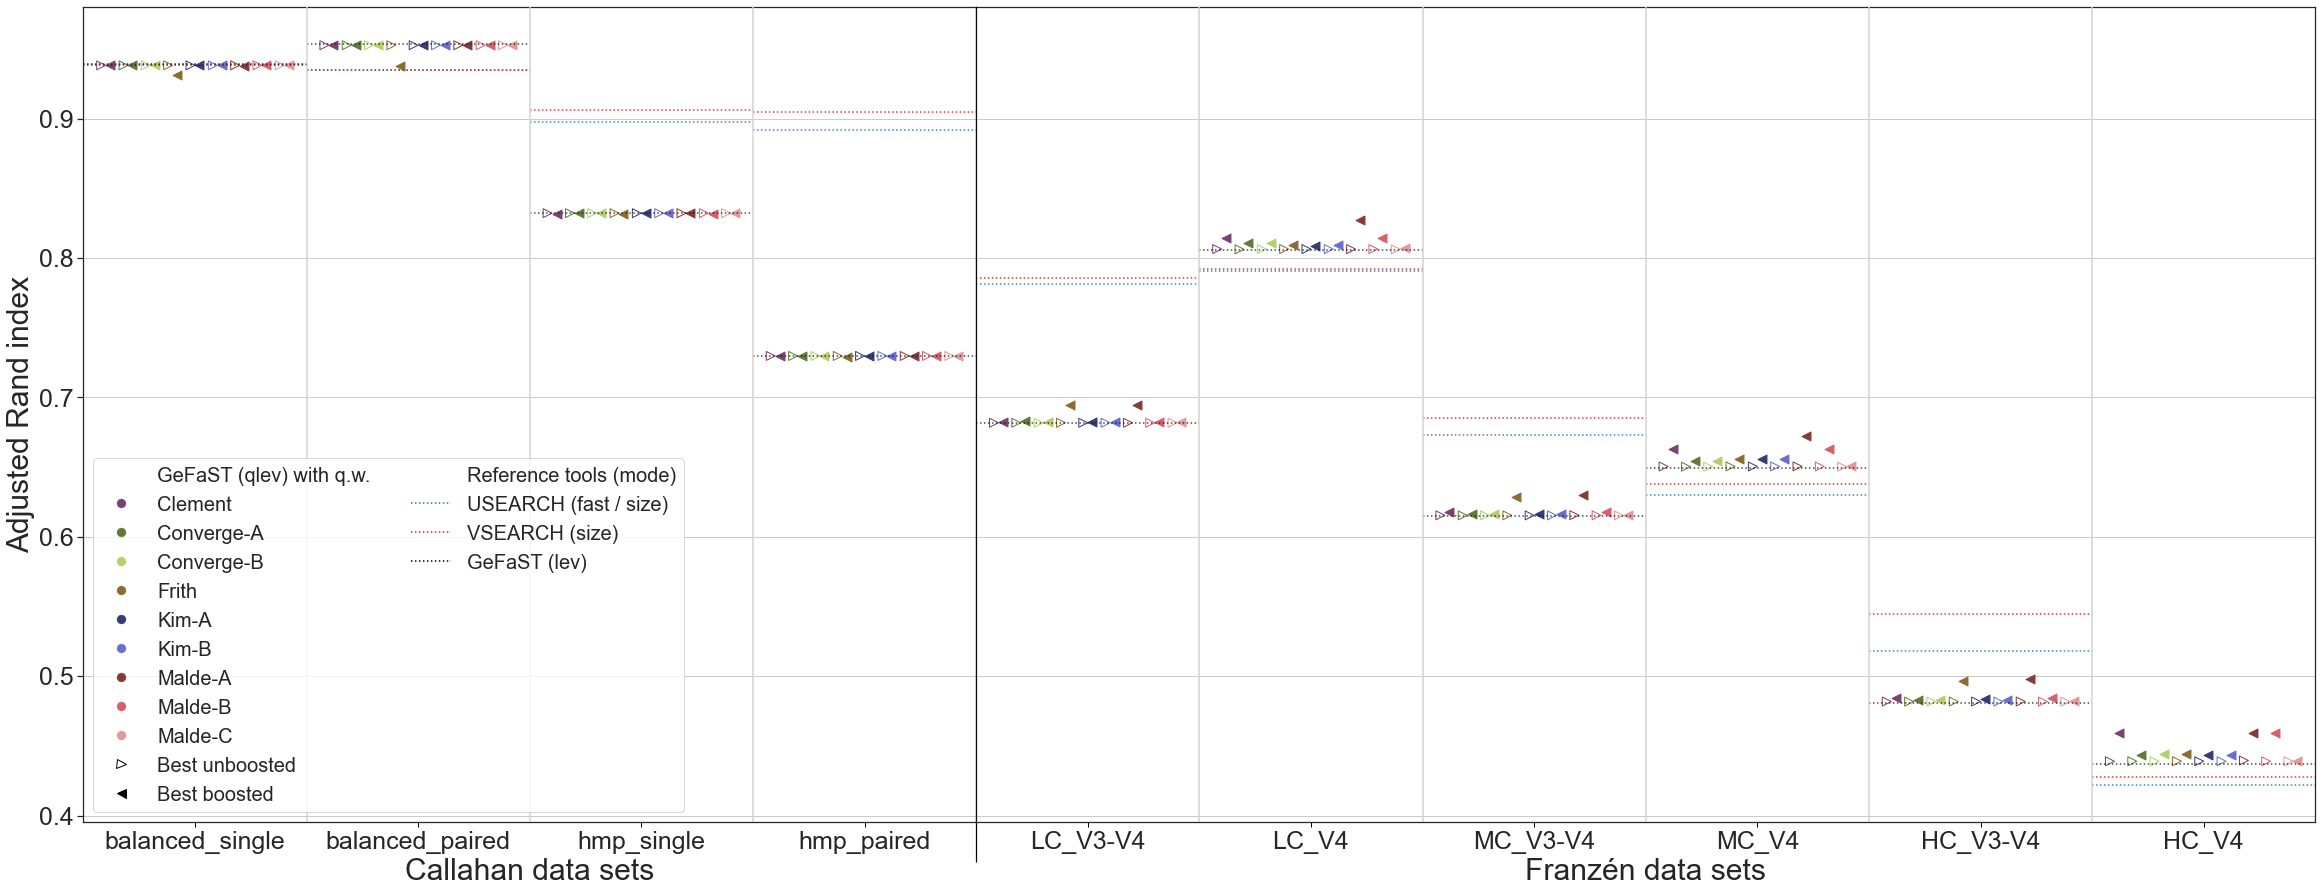

In [22]:
metric = 'adjrandindex'
comparative_plot_quality_selected([('Callahan data sets', df_callahan_gefast_joined_nbest_avg, df_callahan_uvsearch_joined_nbest_avg, 'callahan', ['balanced_single', 'balanced_paired', 'hmp_single', 'hmp_paired']), 
                                   ('Franzén data sets', df_franzen_gefast_joined_nbest_avg, df_franzen_uvsearch_joined_nbest_avg, 'franzen', ['LC_V3-V4', 'LC_V4', 'MC_V3-V4', 'MC_V4', 'HC_V3-V4', 'HC_V4'])], 
                                  metric, selected_modes, selected_variants)

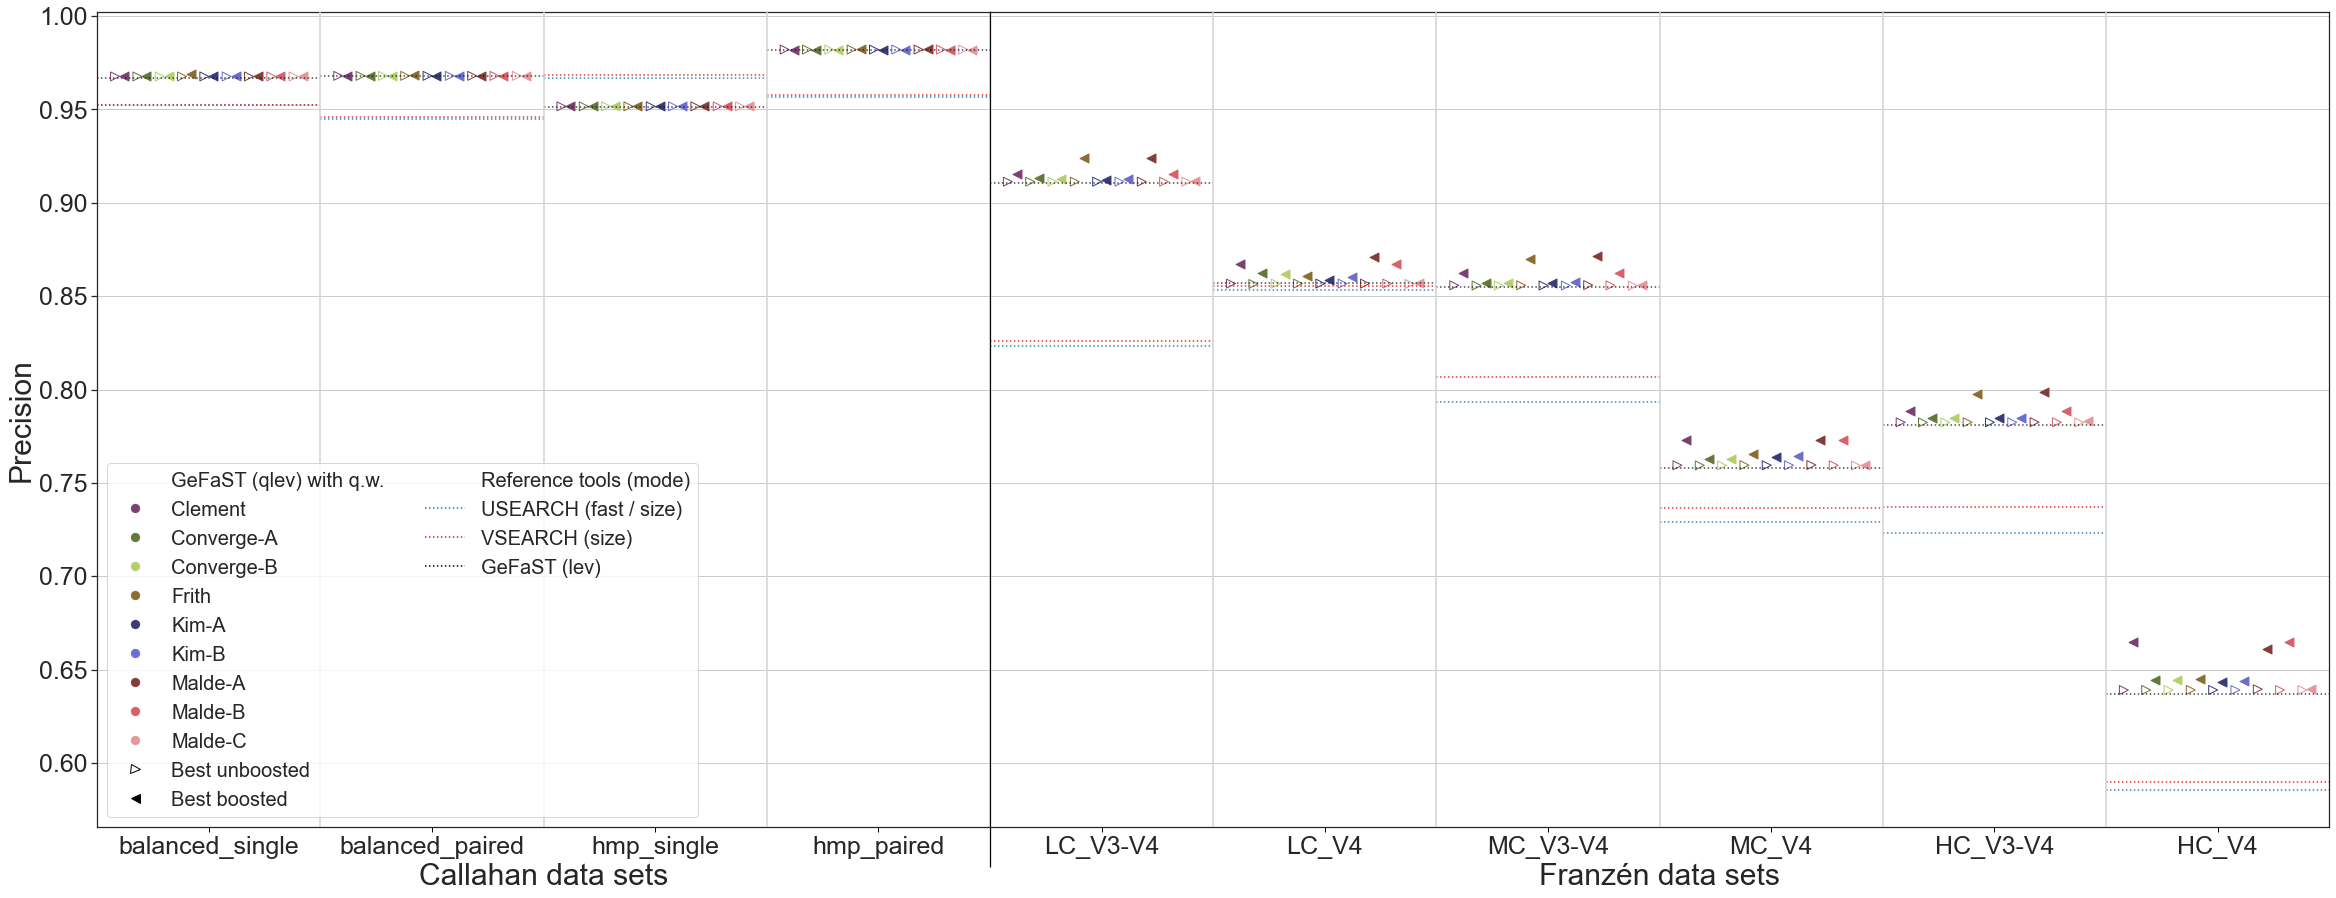

In [23]:
metric = 'precision'
comparative_plot_quality_selected([('Callahan data sets', df_callahan_gefast_joined_nbest_avg, df_callahan_uvsearch_joined_nbest_avg, 'callahan', ['balanced_single', 'balanced_paired', 'hmp_single', 'hmp_paired']), 
                                   ('Franzén data sets', df_franzen_gefast_joined_nbest_avg, df_franzen_uvsearch_joined_nbest_avg, 'franzen', ['LC_V3-V4', 'LC_V4', 'MC_V3-V4', 'MC_V4', 'HC_V3-V4', 'HC_V4'])], 
                                  metric, selected_modes, selected_variants)

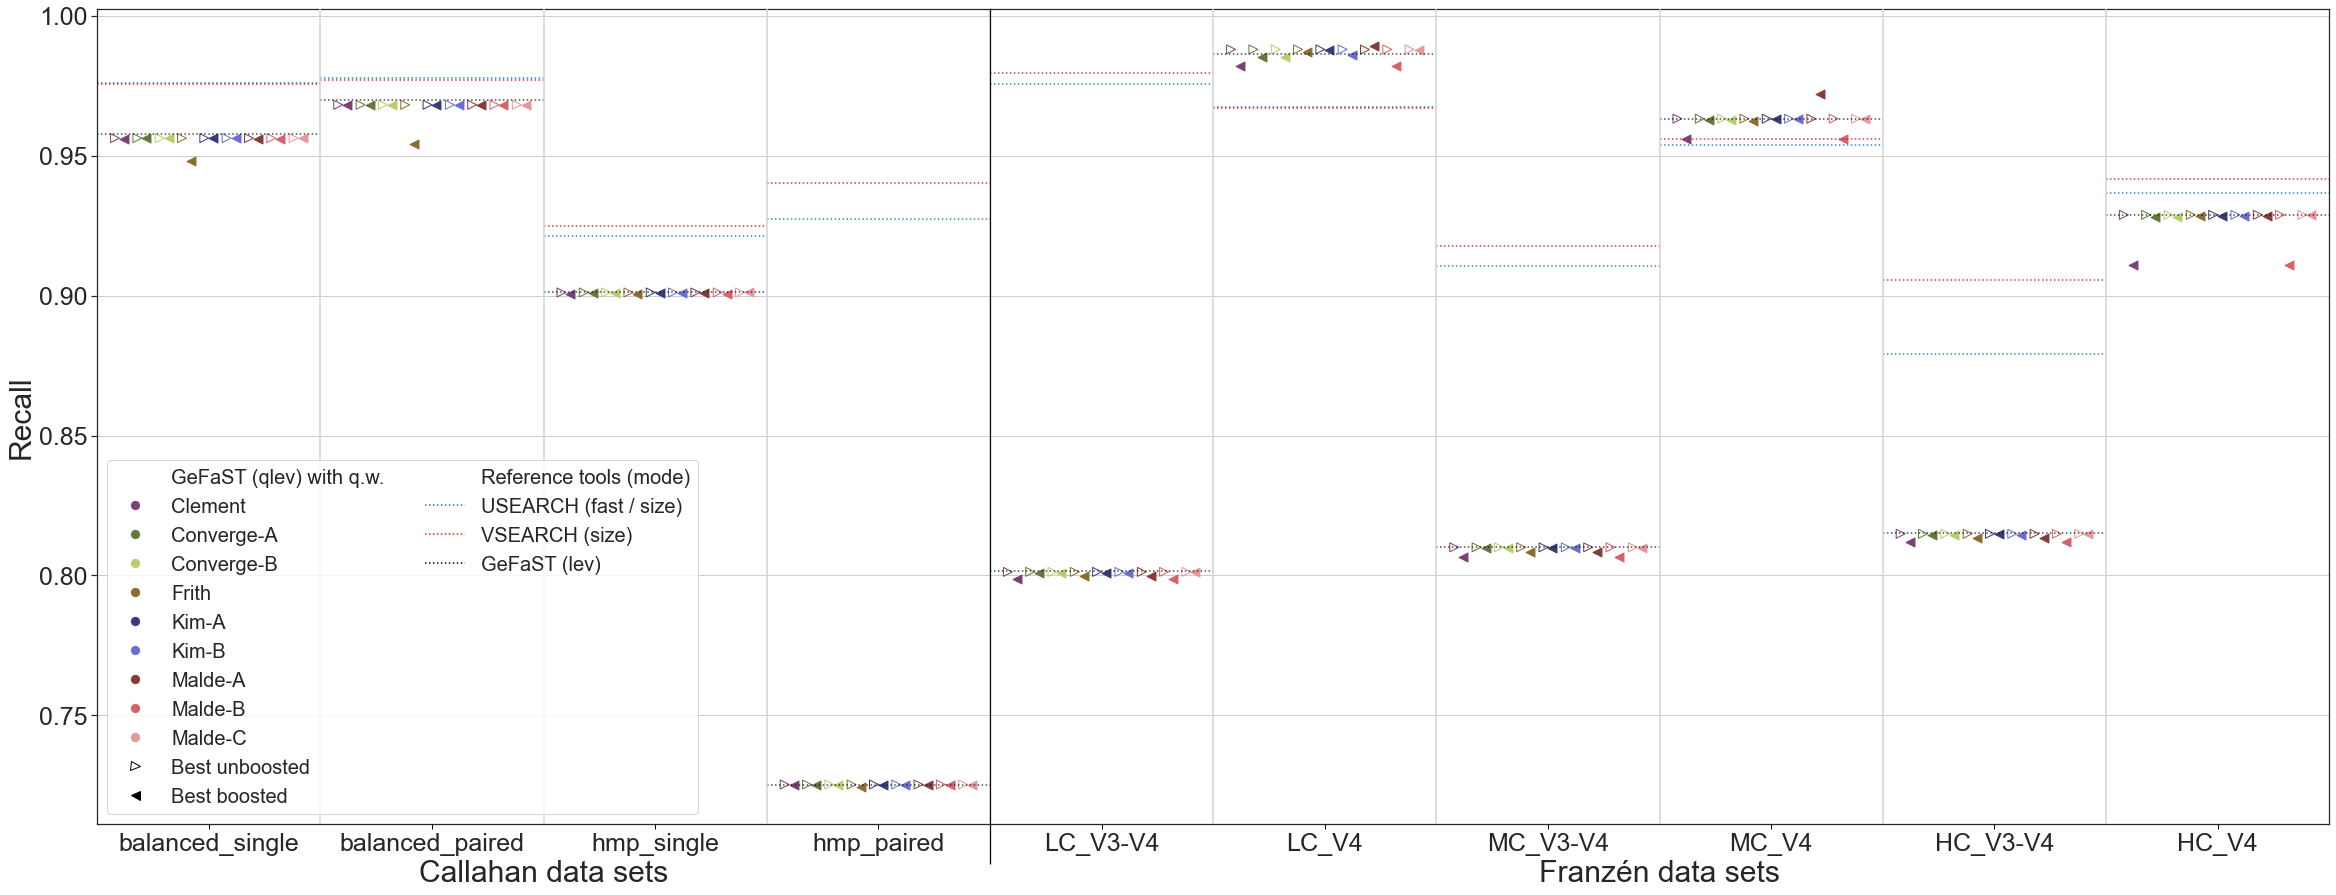

In [24]:
metric = 'recall'
comparative_plot_quality_selected([('Callahan data sets', df_callahan_gefast_joined_nbest_avg, df_callahan_uvsearch_joined_nbest_avg, 'callahan', ['balanced_single', 'balanced_paired', 'hmp_single', 'hmp_paired']), 
                                   ('Franzén data sets', df_franzen_gefast_joined_nbest_avg, df_franzen_uvsearch_joined_nbest_avg, 'franzen', ['LC_V3-V4', 'LC_V4', 'MC_V3-V4', 'MC_V4', 'HC_V3-V4', 'HC_V4'])], 
                                  metric, selected_modes, selected_variants)